## Analysis of Sexual Disease Data From CDC

In [1]:
import numpy as np
import pandas as pd
import altair as alt
from matplotlib import pyplot as plt
import datetime

In [2]:
sexual_disease_data = pd.read_csv("/Users/sukhpreetsahota/Desktop/Duke/Spring 2023/IDS 701.01.SP23/Project/Project Work - My Folder/Data Sources/CDC STD Disease Data_Collective.csv", skiprows=6)
sexual_disease_data_copy = sexual_disease_data.copy()

In [3]:
sexual_disease_data_copy = sexual_disease_data_copy.replace("2020 (COVID-19 Pandemic)", "2020")
sexual_disease_data_copy["Cases"] = sexual_disease_data_copy["Cases"].str.replace(',','')
sexual_disease_data_copy["Population"] = sexual_disease_data_copy["Population"].str.replace(',','')
sexual_disease_data_copy["Year"] = pd.to_datetime(sexual_disease_data_copy["Year"], format = '%Y')
sexual_disease_data_copy["Year"] = sexual_disease_data_copy["Year"].dt.strftime('%Y')
cols = ["Cases", "Rate per 100000", "Population"]
sexual_disease_data_copy[cols] = sexual_disease_data_copy[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [4]:
sexual_disease_data_copy.dtypes

Indicator           object
Year                object
Geography           object
FIPS                 int64
Age Group           object
Race/Ethnicity      object
Sex                 object
Cases              float64
Rate per 100000    float64
Population         float64
dtype: object

In [5]:
for column in sexual_disease_data_copy:
  print(sexual_disease_data_copy[column].unique())

['Gonorrhea' 'Chlamydia' 'Early Non-Primary, Non-Secondary Syphilis'
 'Primary and Secondary Syphilis' 'AIDS prevalence' 'HIV prevalence']
['2020' '2019' '2018' '2017' '2016' '2015' '2014' '2013' '2012' '2011'
 '2010' '2009' '2008']
['Alabama' 'Alabama^' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oklahoma^' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Carolina^' 'South Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']
[ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 4

In [6]:
sexual_disease_data_copy

,Indicator,Year,Geography,FIPS,Age Group,Race/Ethnicity,Sex,Cases,Rate per 100000,Population
0,Gonorrhea,2020,Alabama,1,55+,White,Male,26.0,5.0,515721.0
1,Gonorrhea,2020,Alabama,1,45-54,White,Male,68.0,32.8,207488.0
2,Gonorrhea,2020,Alabama,1,35-44,White,Male,164.0,88.4,185433.0
3,Gonorrhea,2020,Alabama,1,25-34,White,Male,353.0,178.8,197410.0
4,Gonorrhea,2020,Alabama,1,13-24,White,Male,212.0,92.0,230545.0
...,...,...,...,...,...,...,...,...,...,...
278455,HIV prevalence,2008,Wyoming,56,55+,American Indian/Alaska Native,Male,0.0,0.0,800.0
278456,HIV prevalence,2008,Wyoming,56,45-54,American Indian/Alaska Native,Male,3.0,431.0,696.0
278457,HIV prevalence,2008,Wyoming,56,35-44,American Indian/Alaska Native,Male,0.0,0.0,775.0
278458,HIV prevalence,2008,Wyoming,56,25-34,American Indian/Alaska Native,Male,0.0,0.0,949.0


In [7]:
sexual_disease_data_age_group = sexual_disease_data_copy.groupby(["Age Group"])["Cases"].sum()
sexual_disease_data_age_group

Age Group
13-24    11295582.0
25-34     7040711.0
35-44     5035381.0
45-54     6247030.0
55+       5475262.0
Name: Cases, dtype: float64

In [8]:
sexual_disease_data_race = sexual_disease_data_copy.groupby(["Race/Ethnicity"])["Cases"].sum()
sexual_disease_data_race

Race/Ethnicity
American Indian/Alaska Native               296477.0
Asian                                       493330.0
Black/African American                    15123912.0
Hispanic/Latino                            7163304.0
Multiracial                                1158222.0
Native Hawaiian/Other Pacific Islander       63206.0
White                                     10795515.0
Name: Cases, dtype: float64

In [9]:
sexual_disease_data_gender = sexual_disease_data_copy.groupby(["Sex"])["Cases"].sum()
sexual_disease_data_gender

Sex
Female    14974555.0
Male      20119411.0
Name: Cases, dtype: float64

In [10]:
select_states = ["Georgia", "Maryland", "New York", "Delaware", "New Jersey", "Arizona", "Virginia", "Ohio", "Pennsylvania", "Florida", "Louisiana", "California", "Texas", "Illinois", "North Carolina", "Mississippi", "Nevada", "Tennessee", "Arkansas", "New Mexico", "Missouri"]
sexual_disease_data_select_states = sexual_disease_data_copy.loc[sexual_disease_data_copy["Geography"].isin(select_states)]

In [11]:
print(sexual_disease_data_select_states.isna().sum())

Indicator              0
Year                   0
Geography              0
FIPS                   0
Age Group              0
Race/Ethnicity         0
Sex                    0
Cases              10592
Rate per 100000    10592
Population             0
dtype: int64


In [12]:
sexual_disease_data_select_states_null_values = sexual_disease_data_select_states[sexual_disease_data_select_states.isna().any(axis=1)]
sexual_disease_data_select_states_null_values

,Indicator,Year,Geography,FIPS,Age Group,Race/Ethnicity,Sex,Cases,Rate per 100000,Population
14072,Primary and Secondary Syphilis,2019,Arizona,4,13-24,Multiracial,Female,NaN,NaN,18680.0
14077,Primary and Secondary Syphilis,2019,Arizona,4,13-24,Multiracial,Male,NaN,NaN,19282.0
14082,Primary and Secondary Syphilis,2019,Arizona,4,13-24,White,Female,NaN,NaN,230495.0
14087,Primary and Secondary Syphilis,2019,Arizona,4,13-24,White,Male,NaN,NaN,246068.0
14092,Primary and Secondary Syphilis,2019,Arizona,4,13-24,Native Hawaiian/Other Pacific Islander,Female,NaN,NaN,1066.0
...,...,...,...,...,...,...,...,...,...,...
253099,"Early Non-Primary, Non-Secondary Syphilis",2019,Virginia,51,13-24,Black/African American,Male,NaN,NaN,136718.0
253104,"Early Non-Primary, Non-Secondary Syphilis",2019,Virginia,51,13-24,Asian,Female,NaN,NaN,43199.0
253109,"Early Non-Primary, Non-Secondary Syphilis",2019,Virginia,51,13-24,Asian,Male,NaN,NaN,43328.0
253114,"Early Non-Primary, Non-Secondary Syphilis",2019,Virginia,51,13-24,American Indian/Alaska Native,Female,NaN,NaN,1739.0


In [13]:
for column in sexual_disease_data_select_states_null_values:
  print(sexual_disease_data_select_states_null_values[column].unique())

['Primary and Secondary Syphilis' 'AIDS prevalence' 'HIV prevalence'
 'Chlamydia' 'Early Non-Primary, Non-Secondary Syphilis' 'Gonorrhea']
['2019' '2020' '2009' '2008' '2018' '2017' '2016' '2015' '2014' '2013'
 '2012' '2011' '2010']
['Arizona' 'Arkansas' 'Delaware' 'Florida' 'Georgia' 'Illinois'
 'Louisiana' 'Maryland' 'Mississippi' 'Missouri' 'Nevada' 'New Jersey'
 'New Mexico' 'New York' 'North Carolina' 'Ohio' 'Pennsylvania'
 'Tennessee' 'Texas' 'Virginia']
[ 4  5 10 12 13 17 22 24 28 29 32 34 35 36 37 39 42 47 48 51]
['13-24' '55+' '25-34' '45-54' '35-44']
['Multiracial' 'White' 'Native Hawaiian/Other Pacific Islander'
 'Hispanic/Latino' 'Black/African American' 'Asian'
 'American Indian/Alaska Native']
['Female' 'Male']
[nan]
[nan]
[ 18680.  19282. 230495. ...  43328.   1739.   1769.]


In [14]:
# define the list of races to check for missing values
races = ['White', 'Native Hawaiian/Other Pacific Islander', 'Multiracial', 'Hispanic/Latino', 'Black/African American', 'Asian', 'American Indian/Alaska Native']

# check for missing values in the 'Cases' column for each race
for race in races:
    missing_count = sexual_disease_data_select_states.loc[sexual_disease_data_select_states['Race/Ethnicity'] == race, 'Cases'].isna().sum()
    print(f'Number of missing values in "{race}" race category in "Population" column: {missing_count}')

Number of missing values in "White" race category in "Population" column: 1452
Number of missing values in "Native Hawaiian/Other Pacific Islander" race category in "Population" column: 1840
Number of missing values in "Multiracial" race category in "Population" column: 1452
Number of missing values in "Hispanic/Latino" race category in "Population" column: 1452
Number of missing values in "Black/African American" race category in "Population" column: 1452
Number of missing values in "Asian" race category in "Population" column: 1460
Number of missing values in "American Indian/Alaska Native" race category in "Population" column: 1484


In [15]:
# drop rows with missing values in the 'Cases' column for each race
for race in races:
    sexual_disease_data_select_states_no_missing = sexual_disease_data_select_states.loc[(sexual_disease_data_select_states['Cases'].notna())]

sexual_disease_data_select_states_no_missing

,Indicator,Year,Geography,FIPS,Age Group,Race/Ethnicity,Sex,Cases,Rate per 100000,Population
10920,Gonorrhea,2020,Arizona,4,55+,Multiracial,Female,1.0,10.6,9406.0
10921,Gonorrhea,2020,Arizona,4,45-54,Multiracial,Female,5.0,90.4,5534.0
10922,Gonorrhea,2020,Arizona,4,35-44,Multiracial,Female,18.0,228.5,7879.0
10923,Gonorrhea,2020,Arizona,4,25-34,Multiracial,Female,49.0,426.8,11481.0
10924,Gonorrhea,2020,Arizona,4,13-24,Multiracial,Female,49.0,262.3,18680.0
...,...,...,...,...,...,...,...,...,...,...
256615,HIV prevalence,2008,Virginia,51,55+,American Indian/Alaska Native,Male,0.0,0.0,2352.0
256616,HIV prevalence,2008,Virginia,51,45-54,American Indian/Alaska Native,Male,2.0,111.4,1795.0
256617,HIV prevalence,2008,Virginia,51,35-44,American Indian/Alaska Native,Male,3.0,186.9,1605.0
256618,HIV prevalence,2008,Virginia,51,25-34,American Indian/Alaska Native,Male,2.0,126.5,1581.0


In [63]:
print(sexual_disease_data_select_states_no_missing.isna().sum())

Indicator          0
Year               0
Geography          0
FIPS               0
Age Group          0
Race/Ethnicity     0
Sex                0
Cases              0
Rate per 100000    0
Population         0
dtype: int64


In [16]:
sexual_disease_data_md = sexual_disease_data_select_states_no_missing.loc[sexual_disease_data_select_states_no_missing["Geography"] == "Maryland"]
sexual_disease_data_ny = sexual_disease_data_select_states_no_missing.loc[sexual_disease_data_select_states_no_missing["Geography"] == "New York"]
sexual_disease_data_ga = sexual_disease_data_select_states_no_missing.loc[sexual_disease_data_select_states_no_missing["Geography"] == "Georgia"]

md_control_states = ["Delaware", "New Jersey", "Arizona", "Virginia", "Ohio", "Pennsylvania"]
sexual_disease_data_md_control = sexual_disease_data_select_states_no_missing.loc[sexual_disease_data_select_states_no_missing["Geography"].isin(md_control_states)]
ny_control_states = ["Florida", "Louisiana", "California", "Texas", "Illinois"]
sexual_disease_data_ny_control = sexual_disease_data_select_states_no_missing.loc[sexual_disease_data_select_states_no_missing["Geography"].isin(ny_control_states)]
ga_control_states = ["North Carolina", "Mississippi", "Nevada", "Tennessee", "Arkansas", "New Mexico", "Missouri"]
sexual_disease_data_ga_control = sexual_disease_data_select_states_no_missing.loc[sexual_disease_data_select_states_no_missing["Geography"].isin(ga_control_states)]

## Analysis of Disease

In [17]:
def std_pie_chart(std_df, std_column, std_column_2, state_colors, state):
    # Group the dataframe by 'Disease' to calculate the total number of cases 
    std_df_grouped = std_df.groupby(std_column).sum()

    # Create a dataframe for 'Cases' and 'Rate_per_100000'
    std_cases = pd.DataFrame(std_df_grouped[std_column_2])

    # Create a larger figure
    fig = plt.figure(figsize=(14, 12))

    colors = state_colors

    # Create a pie chart to show the distribution of diseases based on the number of cases
    patches, texts, autotexts = plt.pie(std_cases[std_column_2], labels=std_cases.index, autopct='%1.1f%%', colors=colors, textprops={'color': "black"})

    plt.title(f"Distribution of Diseases Based on {std_column_2} in {state}", color='black')

    # Show the plot
    pie_chart = plt.show()
    return pie_chart

In [18]:
ny_colors = ["#00FFFF", "#89CFF0", "#ADD8E6", "#6082B6", "#6495ED", "#40B5AD", "#000080"]
ga_colors = ["#FF69B4", "#FF1493", "#C71585", "#DB7093", "#FFB6C1", "#FF0000", "#8B0000"]
md_colors = ["#088F8F", "#097969", "#90EE90", "#008000", "#98FB98", "#8A9A5B", "#023020"]

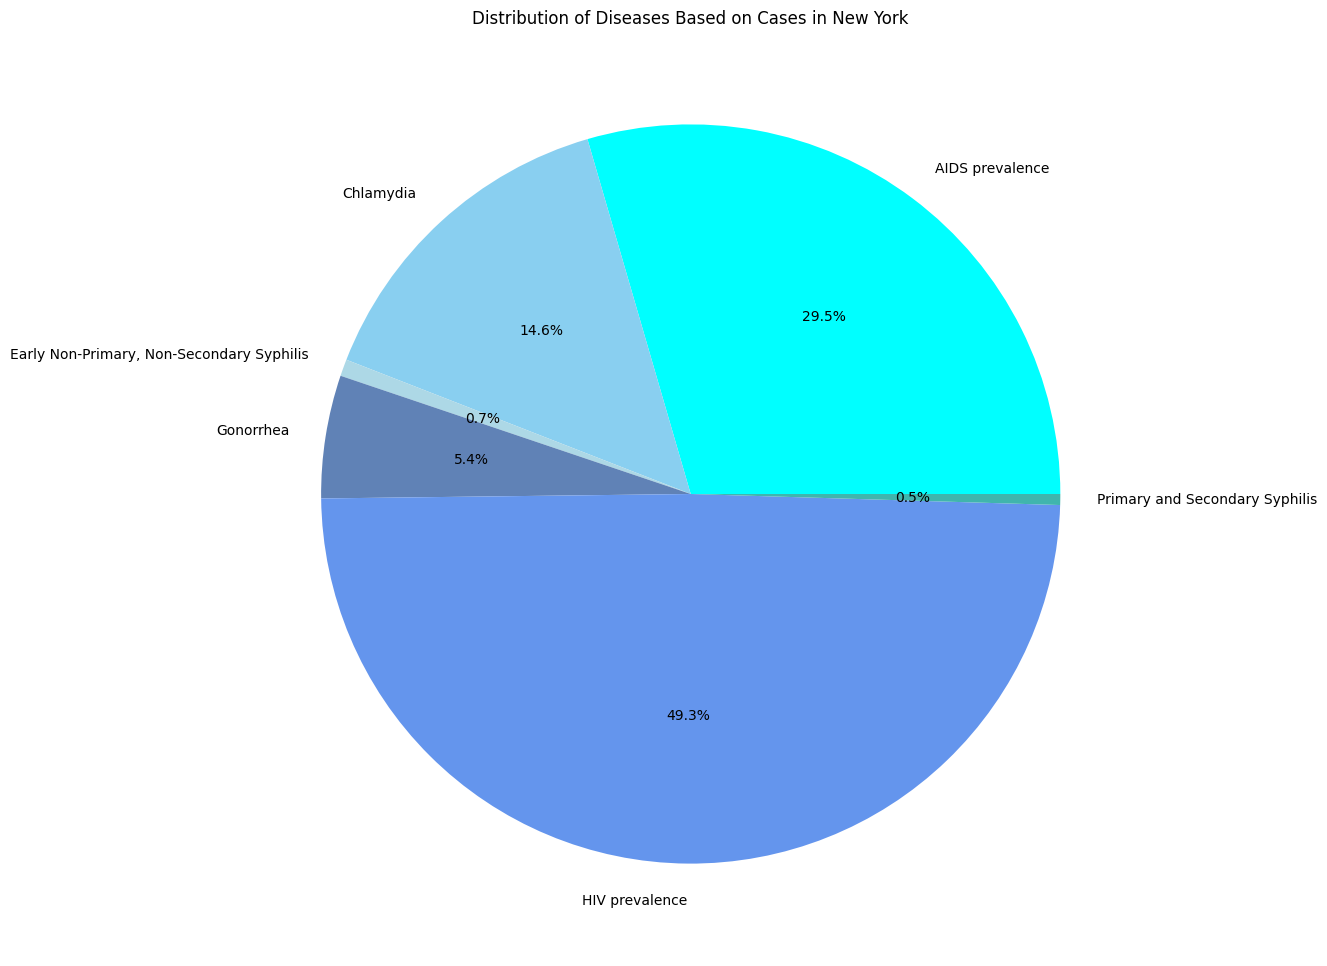

In [19]:
ny_std_by_indicator = std_pie_chart(sexual_disease_data_ny, "Indicator", "Cases", ny_colors, "New York")

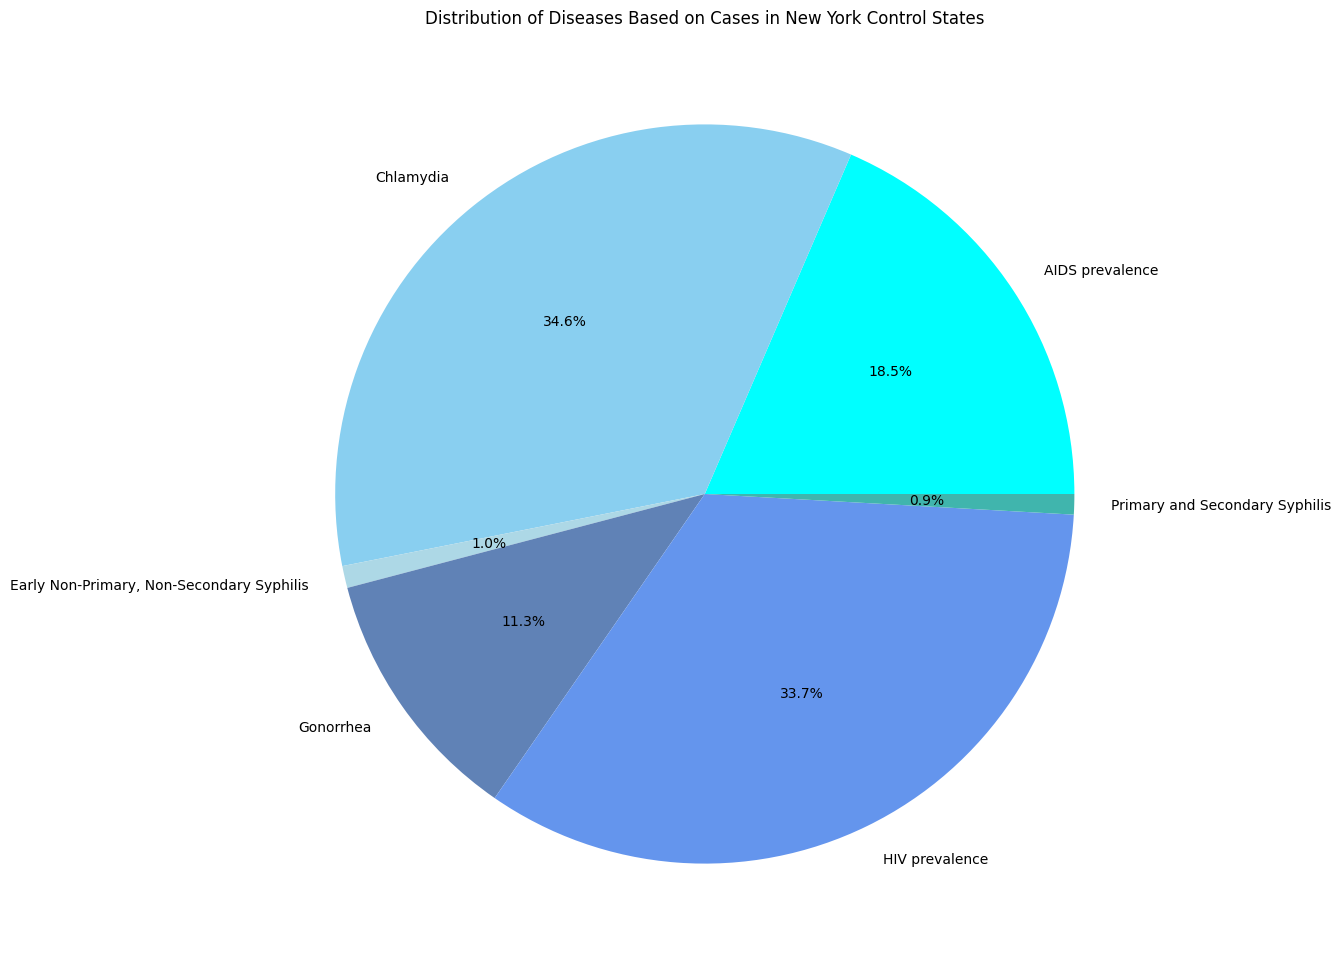

In [20]:
ny_controls_std_by_indicator = std_pie_chart(sexual_disease_data_ny_control, "Indicator", "Cases", ny_colors, "New York Control States")

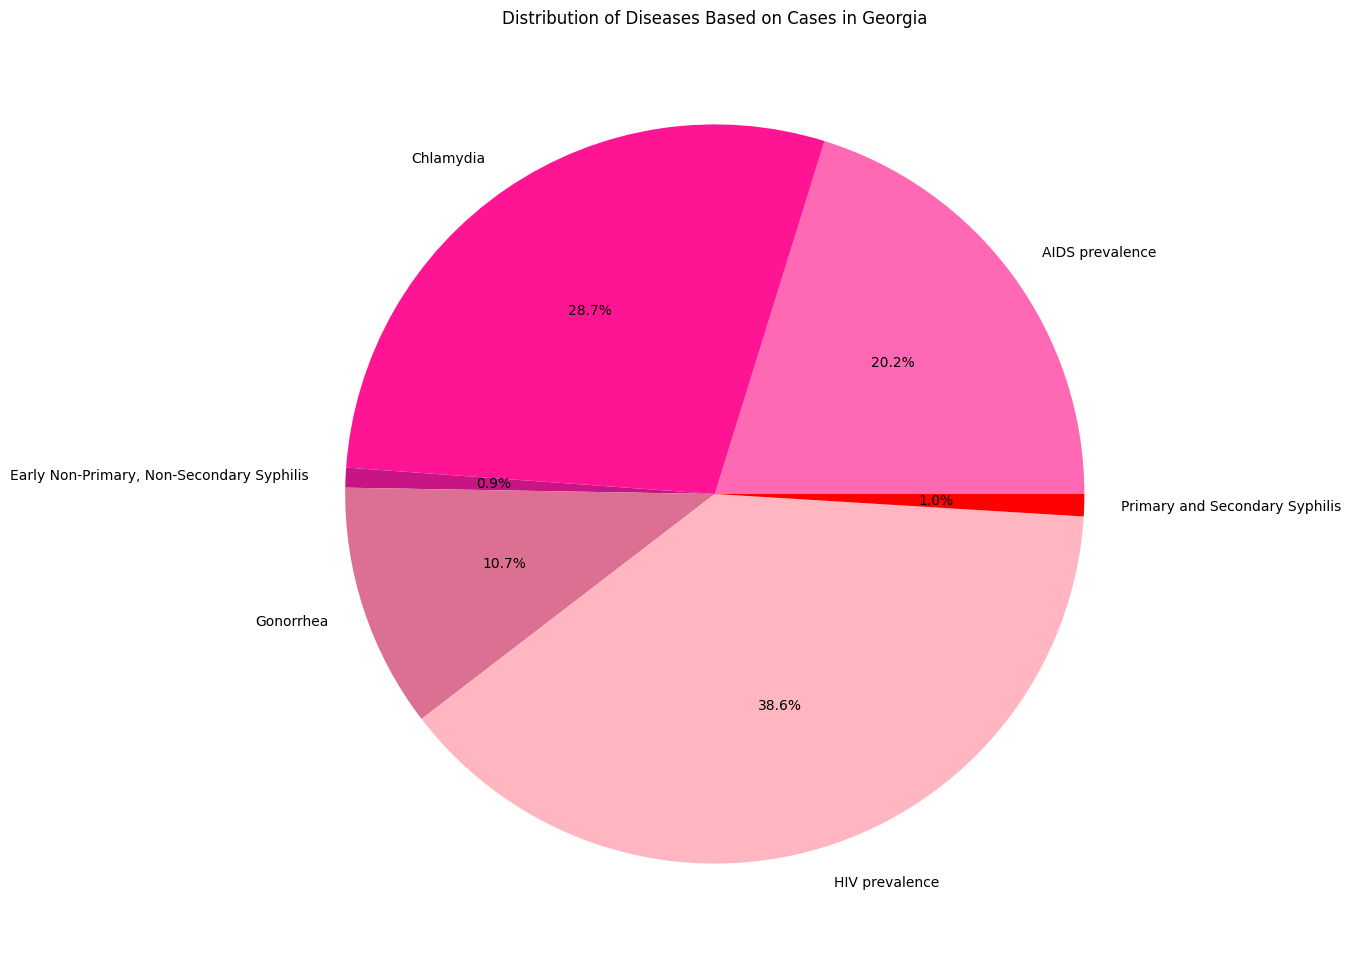

In [21]:
ga_std_by_indicator = std_pie_chart(sexual_disease_data_ga, "Indicator", "Cases", ga_colors, "Georgia")

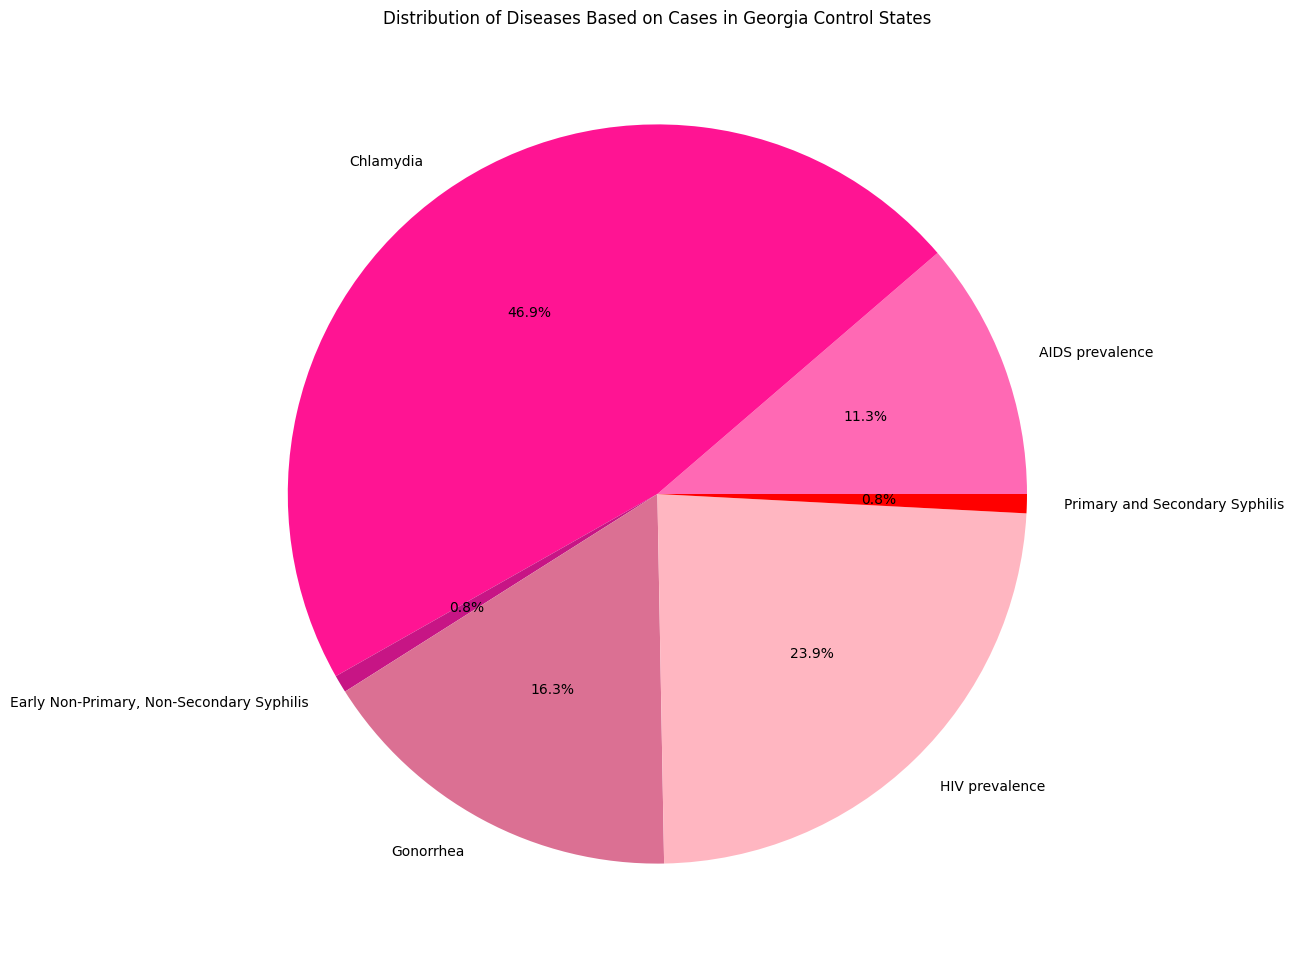

In [22]:
ga_controls_std_by_indicator = std_pie_chart(sexual_disease_data_ga_control, "Indicator", "Cases", ga_colors, "Georgia Control States")

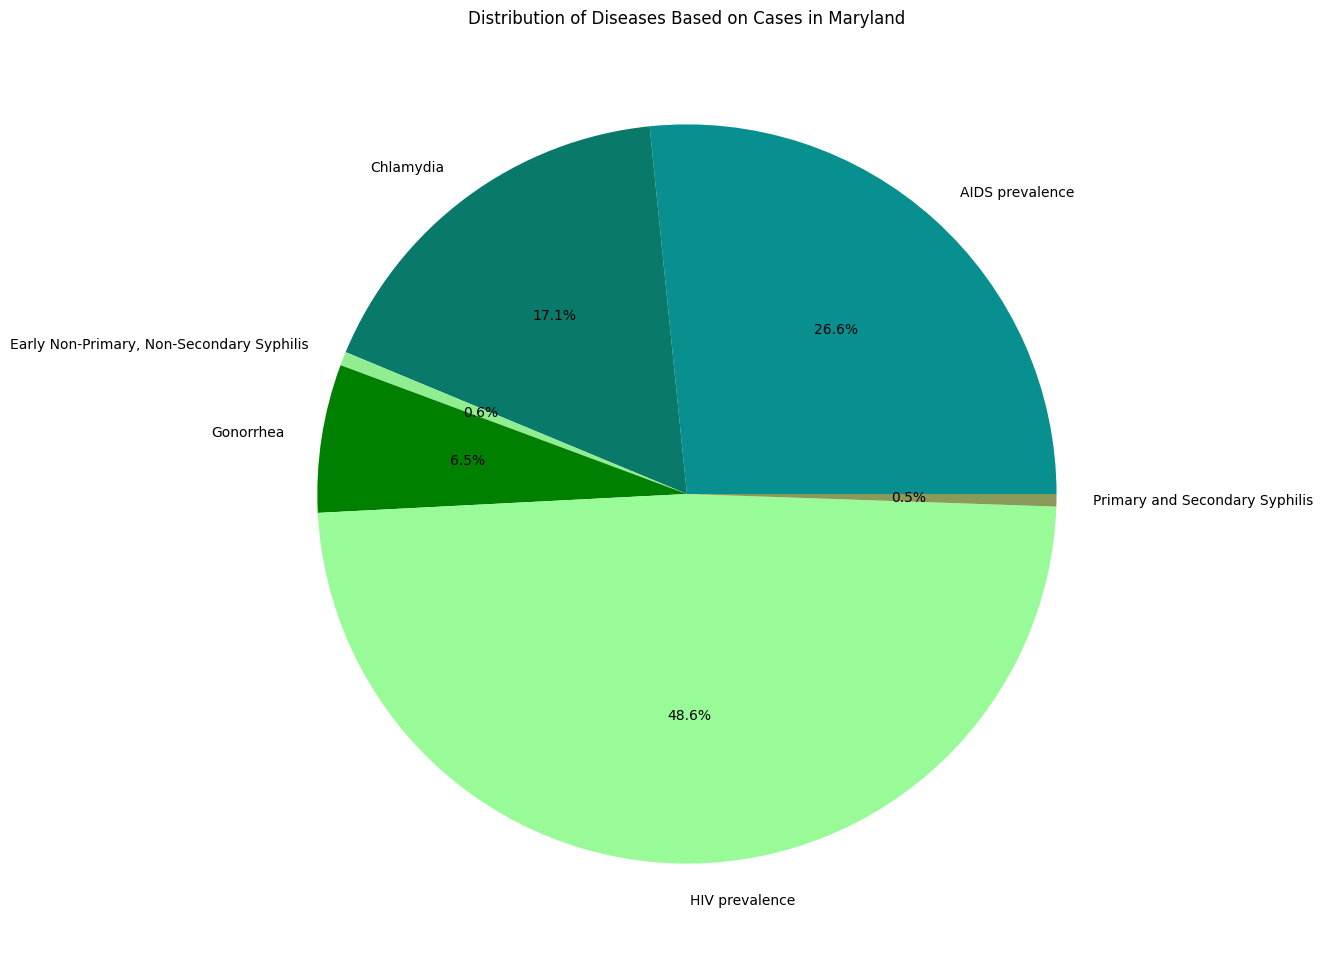

In [23]:
md_std_by_indicator = std_pie_chart(sexual_disease_data_md, "Indicator", "Cases", md_colors, "Maryland")

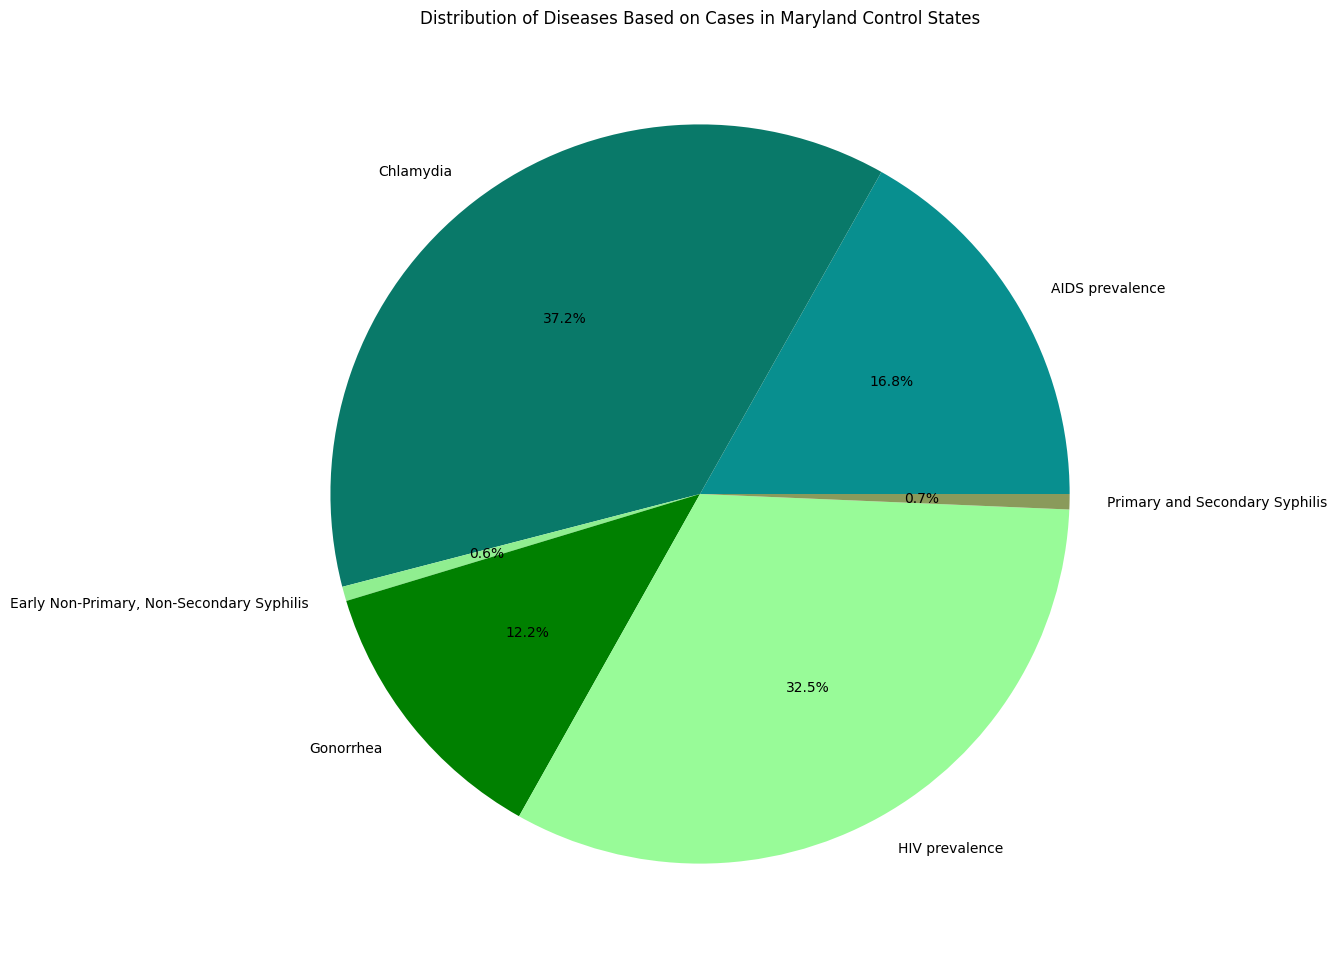

In [24]:
md_controls_std_by_indicator = std_pie_chart(sexual_disease_data_md_control, "Indicator", "Cases", md_colors, "Maryland Control States")

## Using HIV Diagnoses and AIDS Classifications

In [25]:
sexual_disease_data_2 = pd.read_csv("/Users/sukhpreetsahota/Desktop/Duke/Spring 2023/IDS 701.01.SP23/Project/Project Work - My Folder/Data Sources/CDC STD Disease Data_Collective_HIV and AIDS Classifications.csv", skiprows=6)
sexual_disease_data_2_copy = sexual_disease_data_2.copy()

In [26]:
sexual_disease_data_2_copy = sexual_disease_data_2_copy.replace("2020 (COVID-19 Pandemic)", "2020")
sexual_disease_data_2_copy["Cases"] = sexual_disease_data_2_copy["Cases"].str.replace(',','')
sexual_disease_data_2_copy["Population"] = sexual_disease_data_2_copy["Population"].str.replace(',','')
sexual_disease_data_2_copy["Year"] = pd.to_datetime(sexual_disease_data_2_copy["Year"], format = '%Y')
sexual_disease_data_2_copy["Year"] = sexual_disease_data_2_copy["Year"].dt.strftime('%Y')
cols = ["Cases", "Rate per 100000", "Population"]
sexual_disease_data_2_copy[cols] = sexual_disease_data_2_copy[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [27]:
sexual_disease_data_2_copy.dtypes

Indicator           object
Year                object
Geography           object
FIPS                 int64
Age Group           object
Race/Ethnicity      object
Sex                 object
Cases              float64
Rate per 100000    float64
Population         float64
dtype: object

In [28]:
for column in sexual_disease_data_2_copy:
  print(sexual_disease_data_2_copy[column].unique())

['Gonorrhea' 'Chlamydia' 'Early Non-Primary, Non-Secondary Syphilis'
 'Primary and Secondary Syphilis' 'AIDS classifications' 'HIV diagnoses']
['2018' '2017' '2016' '2015' '2014' '2013' '2012' '2011' '2010' '2009'
 '2008' '2020' '2019']
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
[ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49 50 51 53
 54 55 56]
[

In [29]:
sexual_disease_data_2_copy

,Indicator,Year,Geography,FIPS,Age Group,Race/Ethnicity,Sex,Cases,Rate per 100000,Population
0,Gonorrhea,2018,Alabama,1,35-44,American Indian/Alaska Native,Female,1.0,56.5,1769.0
1,Gonorrhea,2018,Alabama,1,25-34,American Indian/Alaska Native,Female,3.0,161.8,1854.0
2,Gonorrhea,2018,Alabama,1,13-24,American Indian/Alaska Native,Female,4.0,186.7,2143.0
3,Gonorrhea,2018,Alabama,1,55+,American Indian/Alaska Native,Male,0.0,0.0,4327.0
4,Gonorrhea,2018,Alabama,1,45-54,American Indian/Alaska Native,Male,0.0,0.0,1828.0
...,...,...,...,...,...,...,...,...,...,...
278455,HIV diagnoses,2008,Wyoming,56,55+,American Indian/Alaska Native,Male,0.0,0.0,800.0
278456,HIV diagnoses,2008,Wyoming,56,45-54,American Indian/Alaska Native,Male,0.0,0.0,696.0
278457,HIV diagnoses,2008,Wyoming,56,35-44,American Indian/Alaska Native,Male,0.0,0.0,775.0
278458,HIV diagnoses,2008,Wyoming,56,25-34,American Indian/Alaska Native,Male,0.0,0.0,949.0


In [30]:
sexual_disease_data_age_group_2 = sexual_disease_data_2_copy.groupby(["Age Group"])["Cases"].sum()
sexual_disease_data_age_group_2

Age Group
13-24    10885528.0
25-34     5006032.0
35-44     1438665.0
45-54      621379.0
55+        267593.0
Name: Cases, dtype: float64

In [31]:
sexual_disease_data_race_2 = sexual_disease_data_2_copy.groupby(["Race/Ethnicity"])["Cases"].sum()
sexual_disease_data_race_2

Race/Ethnicity
American Indian/Alaska Native              252702.0
Asian                                      297707.0
Black/African American                    8271721.0
Hispanic/Latino                           3361075.0
Multiracial                                201502.0
Native Hawaiian/Other Pacific Islander      51390.0
White                                     5783100.0
Name: Cases, dtype: float64

In [32]:
sexual_disease_data_gender_2 = sexual_disease_data_2_copy.groupby(["Sex"])["Cases"].sum()
sexual_disease_data_gender_2

Sex
Female    10911764.0
Male       7307433.0
Name: Cases, dtype: float64

In [33]:
sexual_disease_data_2_select_states = sexual_disease_data_2_copy.loc[sexual_disease_data_2_copy["Geography"].isin(select_states)]

In [34]:
print(sexual_disease_data_2_select_states.isna().sum())

Indicator              0
Year                   0
Geography              0
FIPS                   0
Age Group              0
Race/Ethnicity         0
Sex                    0
Cases              10592
Rate per 100000    10592
Population             0
dtype: int64


In [35]:
# drop rows with missing values in the 'Cases' column for each race
for race in races:
    sexual_disease_data_select_states_no_missing_2 = sexual_disease_data_2_select_states.loc[(sexual_disease_data_2_select_states['Cases'].notna())]

sexual_disease_data_select_states_no_missing_2

,Indicator,Year,Geography,FIPS,Age Group,Race/Ethnicity,Sex,Cases,Rate per 100000,Population
10920,Gonorrhea,2012,Arizona,4,35-44,Asian,Female,4.0,21.2,18892.0
10921,Gonorrhea,2012,Arizona,4,25-34,Asian,Female,5.0,28.2,17706.0
10922,Gonorrhea,2012,Arizona,4,13-24,Asian,Female,6.0,40.5,14817.0
10923,Gonorrhea,2012,Arizona,4,55+,Asian,Male,0.0,0.0,13964.0
10924,Gonorrhea,2012,Arizona,4,45-54,Asian,Male,3.0,26.7,11218.0
...,...,...,...,...,...,...,...,...,...,...
256615,HIV diagnoses,2008,Virginia,51,55+,American Indian/Alaska Native,Male,0.0,0.0,2352.0
256616,HIV diagnoses,2008,Virginia,51,45-54,American Indian/Alaska Native,Male,0.0,0.0,1795.0
256617,HIV diagnoses,2008,Virginia,51,35-44,American Indian/Alaska Native,Male,0.0,0.0,1605.0
256618,HIV diagnoses,2008,Virginia,51,25-34,American Indian/Alaska Native,Male,0.0,0.0,1581.0


In [36]:
sexual_disease_data_md_2 = sexual_disease_data_select_states_no_missing_2.loc[sexual_disease_data_select_states_no_missing_2["Geography"] == "Maryland"]
sexual_disease_data_ny_2 = sexual_disease_data_select_states_no_missing_2.loc[sexual_disease_data_select_states_no_missing_2["Geography"] == "New York"]
sexual_disease_data_ga_2 = sexual_disease_data_select_states_no_missing_2.loc[sexual_disease_data_select_states_no_missing_2["Geography"] == "Georgia"]

sexual_disease_data_md_control_2 = sexual_disease_data_select_states_no_missing_2.loc[sexual_disease_data_select_states_no_missing_2["Geography"].isin(md_control_states)]
sexual_disease_data_ny_control_2 = sexual_disease_data_select_states_no_missing_2.loc[sexual_disease_data_select_states_no_missing_2["Geography"].isin(ny_control_states)]
sexual_disease_data_ga_control_2 = sexual_disease_data_select_states_no_missing_2.loc[sexual_disease_data_select_states_no_missing_2["Geography"].isin(ga_control_states)]

## Analysis of Disease

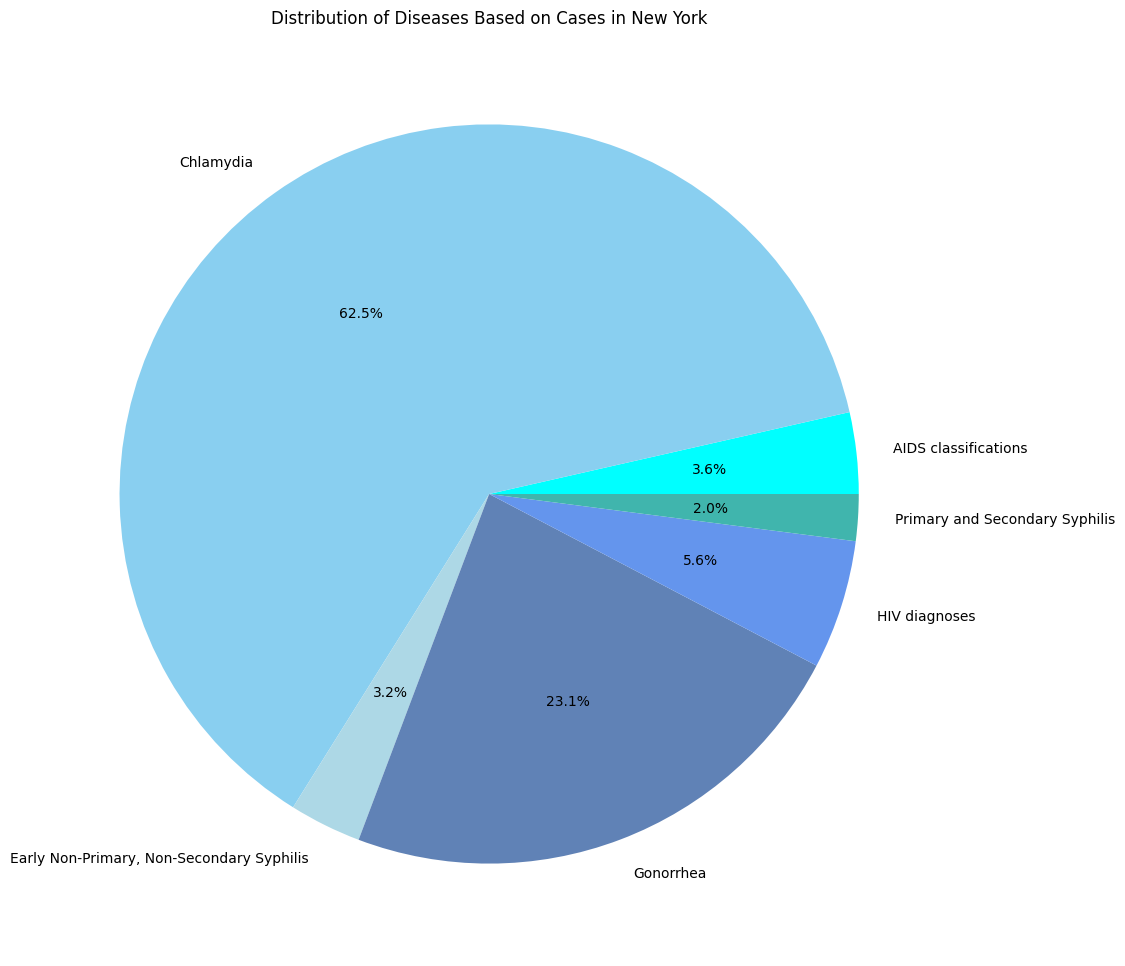

In [37]:
ny_std_by_indicator_2 = std_pie_chart(sexual_disease_data_ny_2, "Indicator", "Cases", ny_colors, "New York")

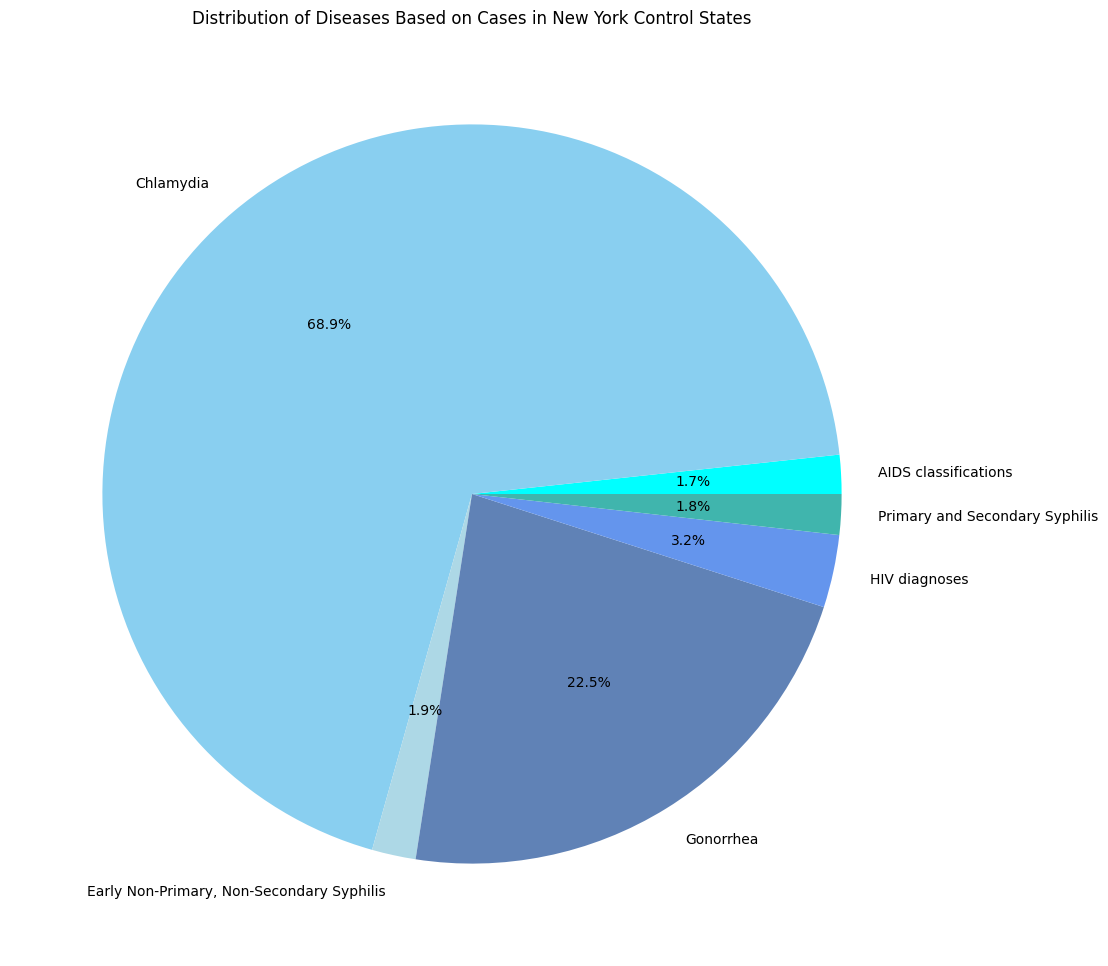

In [38]:
ny_controls_std_by_indicator_2 = std_pie_chart(sexual_disease_data_ny_control_2, "Indicator", "Cases", ny_colors, "New York Control States")

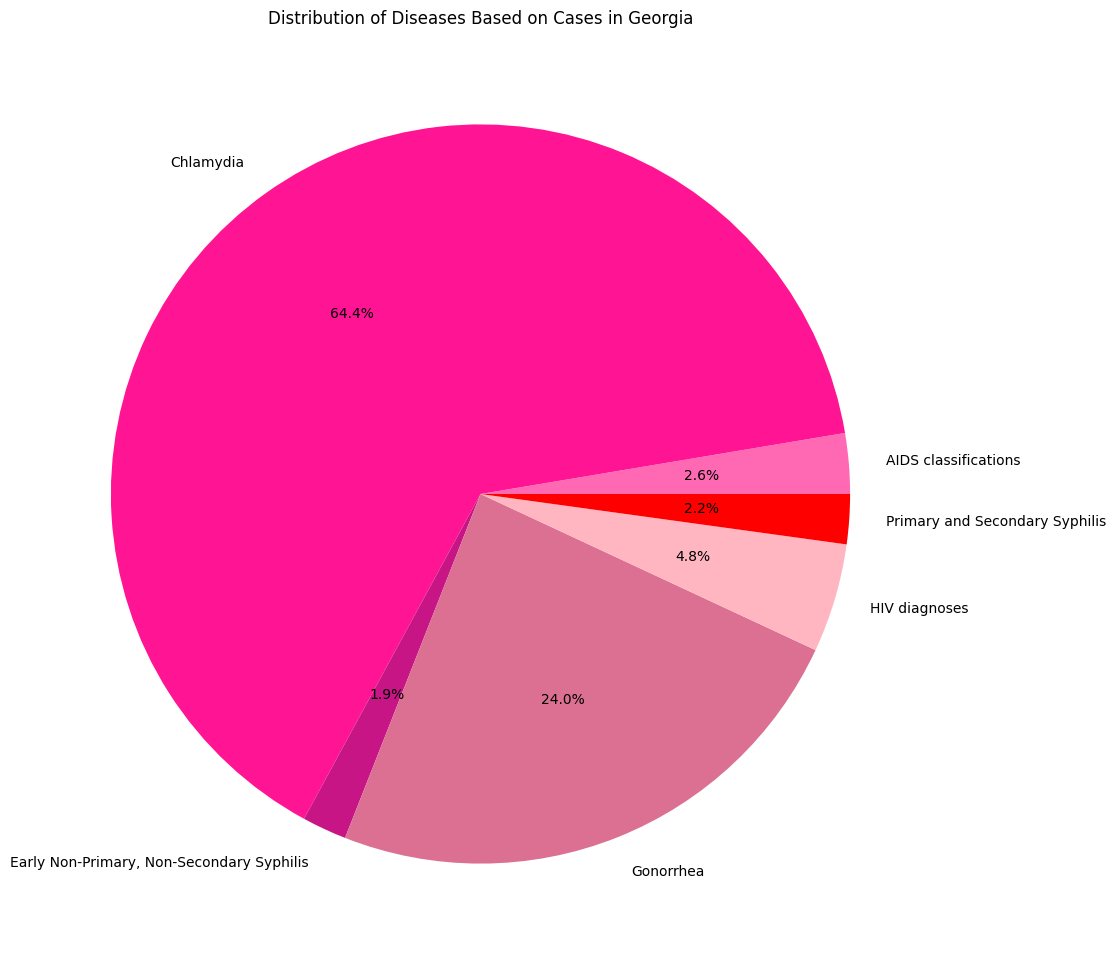

In [39]:
ga_std_by_indicator_2 = std_pie_chart(sexual_disease_data_ga_2, "Indicator", "Cases", ga_colors, "Georgia")

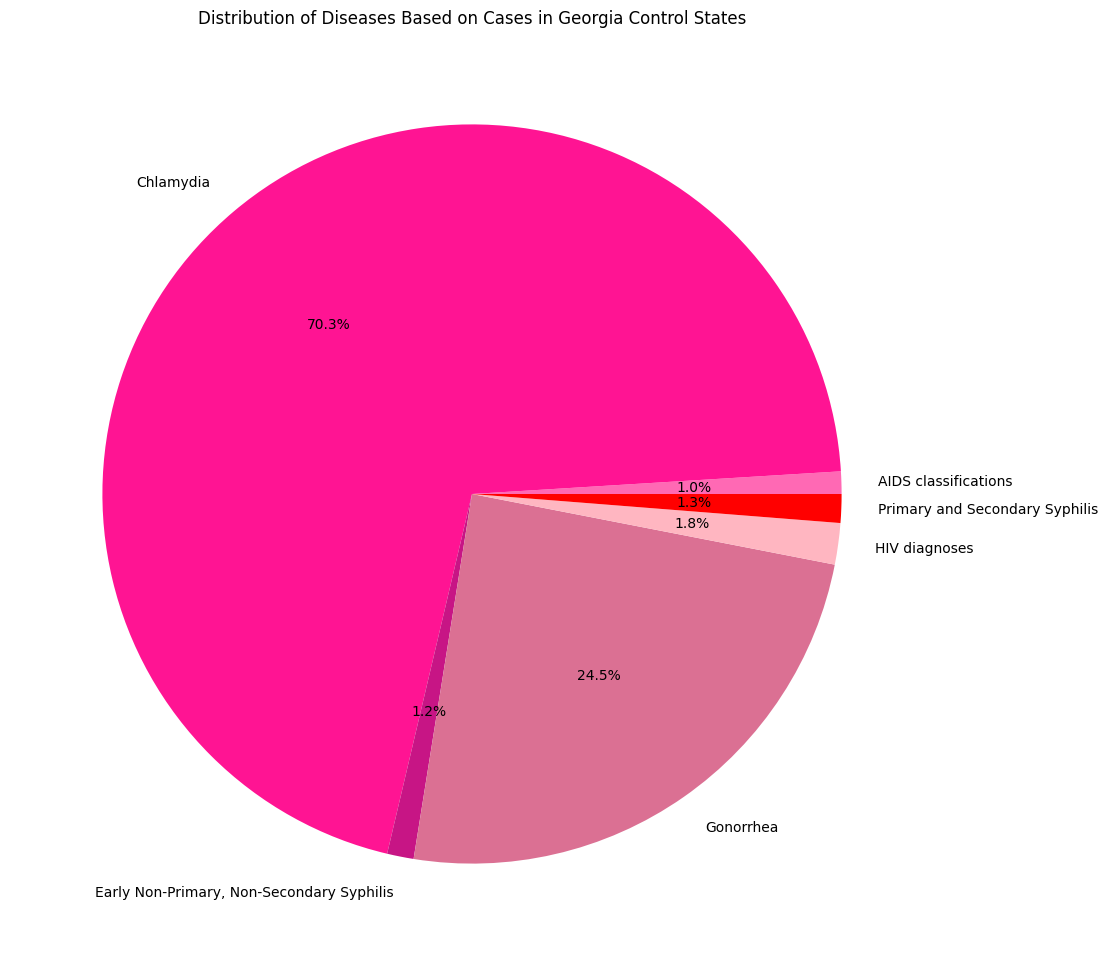

In [40]:
ga_controls_std_by_indicator_2 = std_pie_chart(sexual_disease_data_ga_control_2, "Indicator", "Cases", ga_colors, "Georgia Control States")

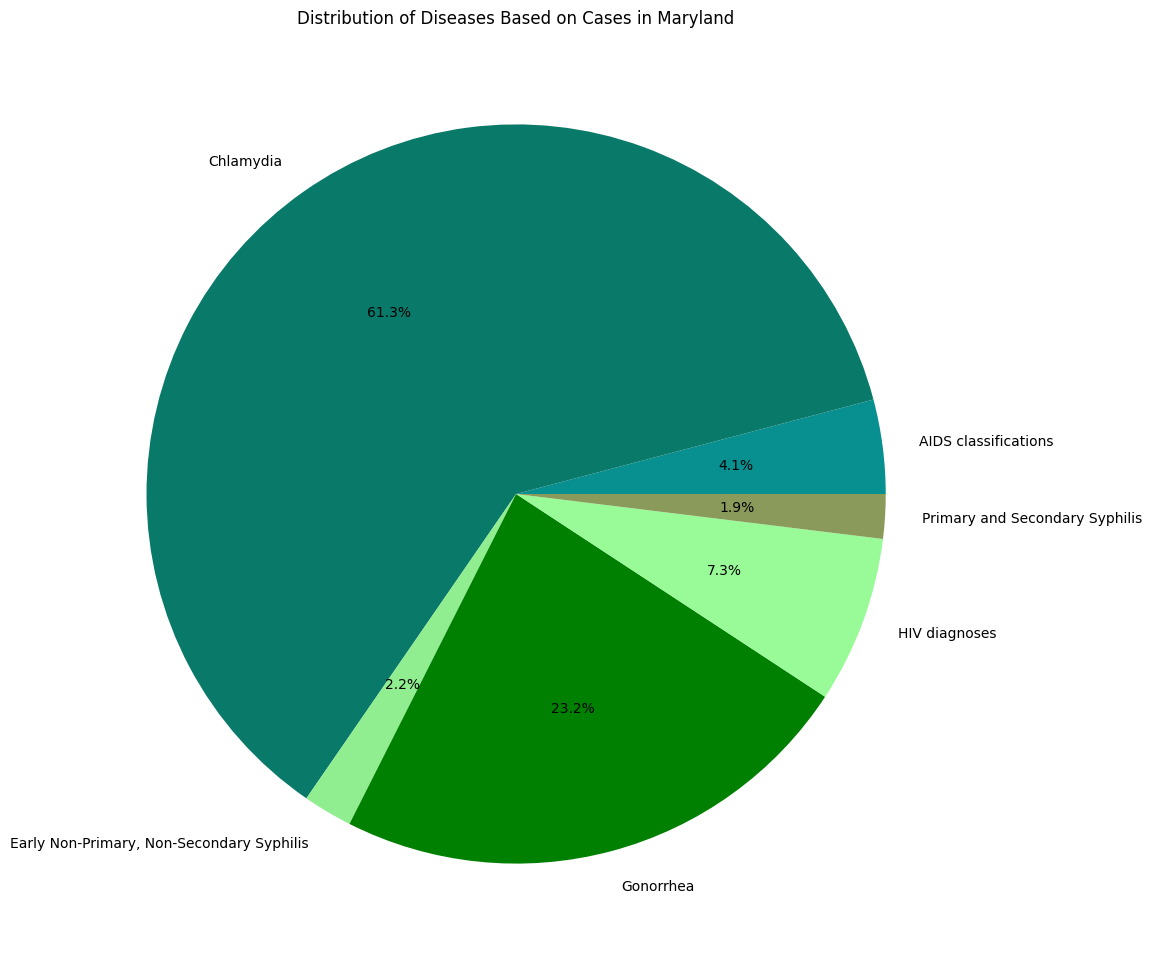

In [41]:
md_std_by_indicator_2 = std_pie_chart(sexual_disease_data_md_2, "Indicator", "Cases", md_colors, "Maryland")

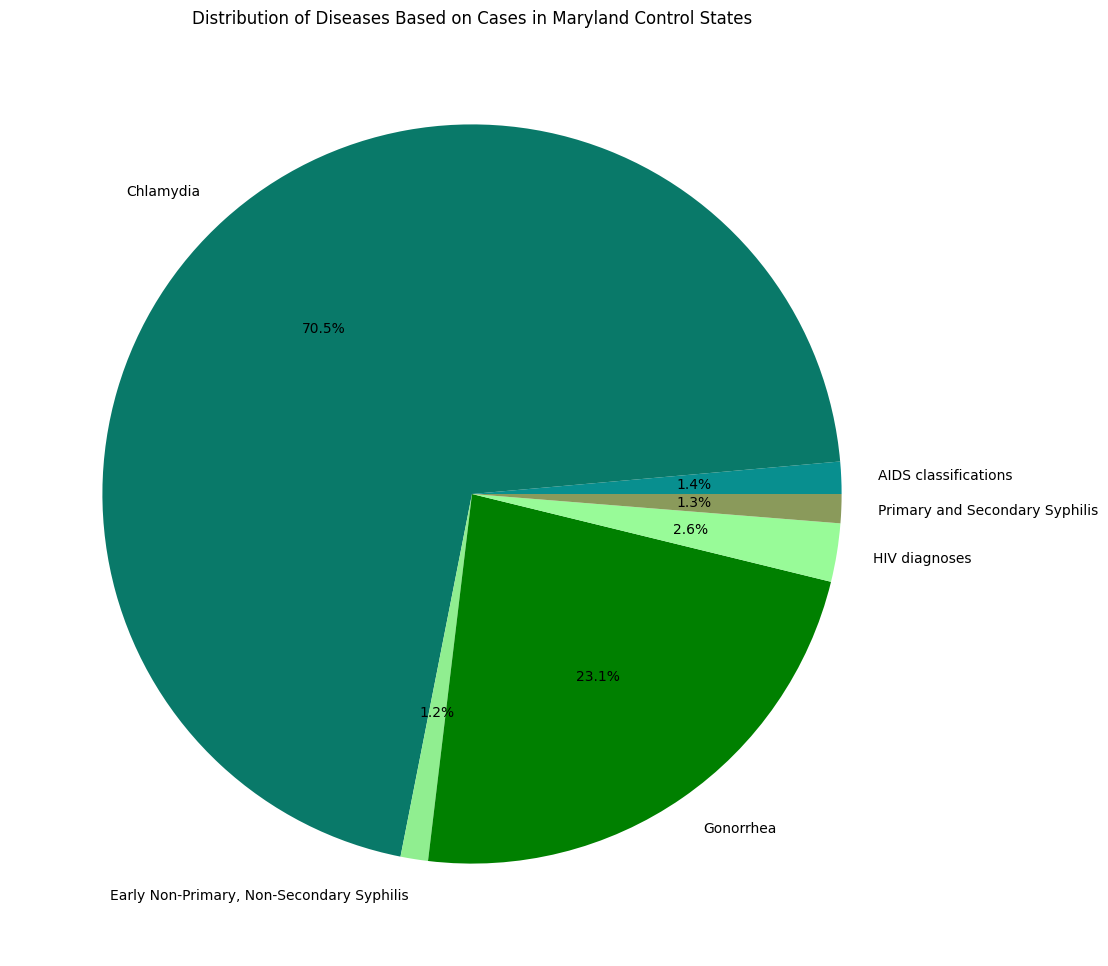

In [42]:
md_controls_std_by_indicator_2 = std_pie_chart(sexual_disease_data_md_control_2, "Indicator", "Cases", md_colors, "Maryland Control States")

## Analysis of Race

In [43]:
def std_bar_chart(std_df, std_column, std_column_2, state_colors, state):
    # Create a larger figure
    fig, ax = plt.subplots(figsize=(20, 10))

    colors = state_colors

    labels = list(std_df[std_column].unique())
    labels_sorted = labels.sort(reverse=True)

    sizes = [int(std_df[(std_df[std_column] == label)][std_column_2].mean()) for label in labels]

    # Add custom colors to the bar chart
    bars = ax.barh(labels, sizes, color=colors)

    # Add formatting to the bar chart
    ax.set_title(f'Average STD {std_column_2} by {std_column} in {state}', color='black')
    ax.set_xlabel(f'{std_column_2}', color='black')
    ax.set_ylabel(f'{std_column}', color='black')
    plt.xticks(color='black')
    plt.yticks(color='black')

    # Add values of STD_per_100000 sum for each race in black color
    for i, bar in enumerate(bars):
        ax.text(bar.get_width()+0.5, bar.get_y()+0.4, str(round(sizes[i],1)), color='black')

    bar_chart = plt.show()
    return bar_chart

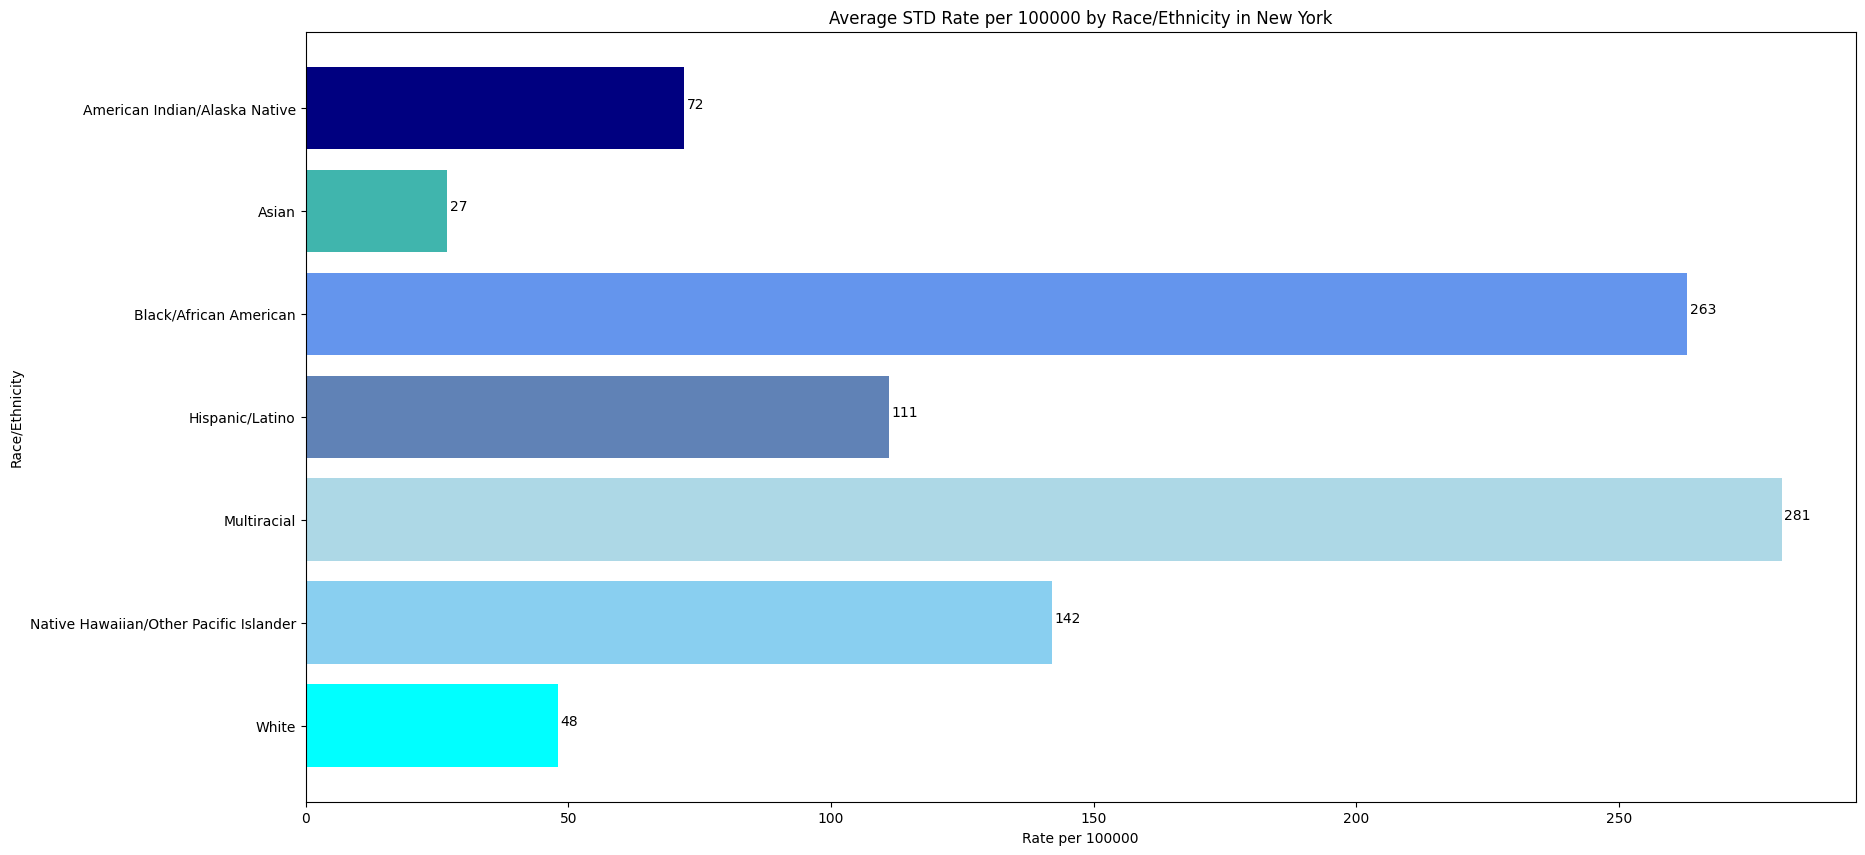

In [44]:
ny_std_by_race = std_bar_chart(sexual_disease_data_ny_2, "Race/Ethnicity", "Rate per 100000", ny_colors, "New York")

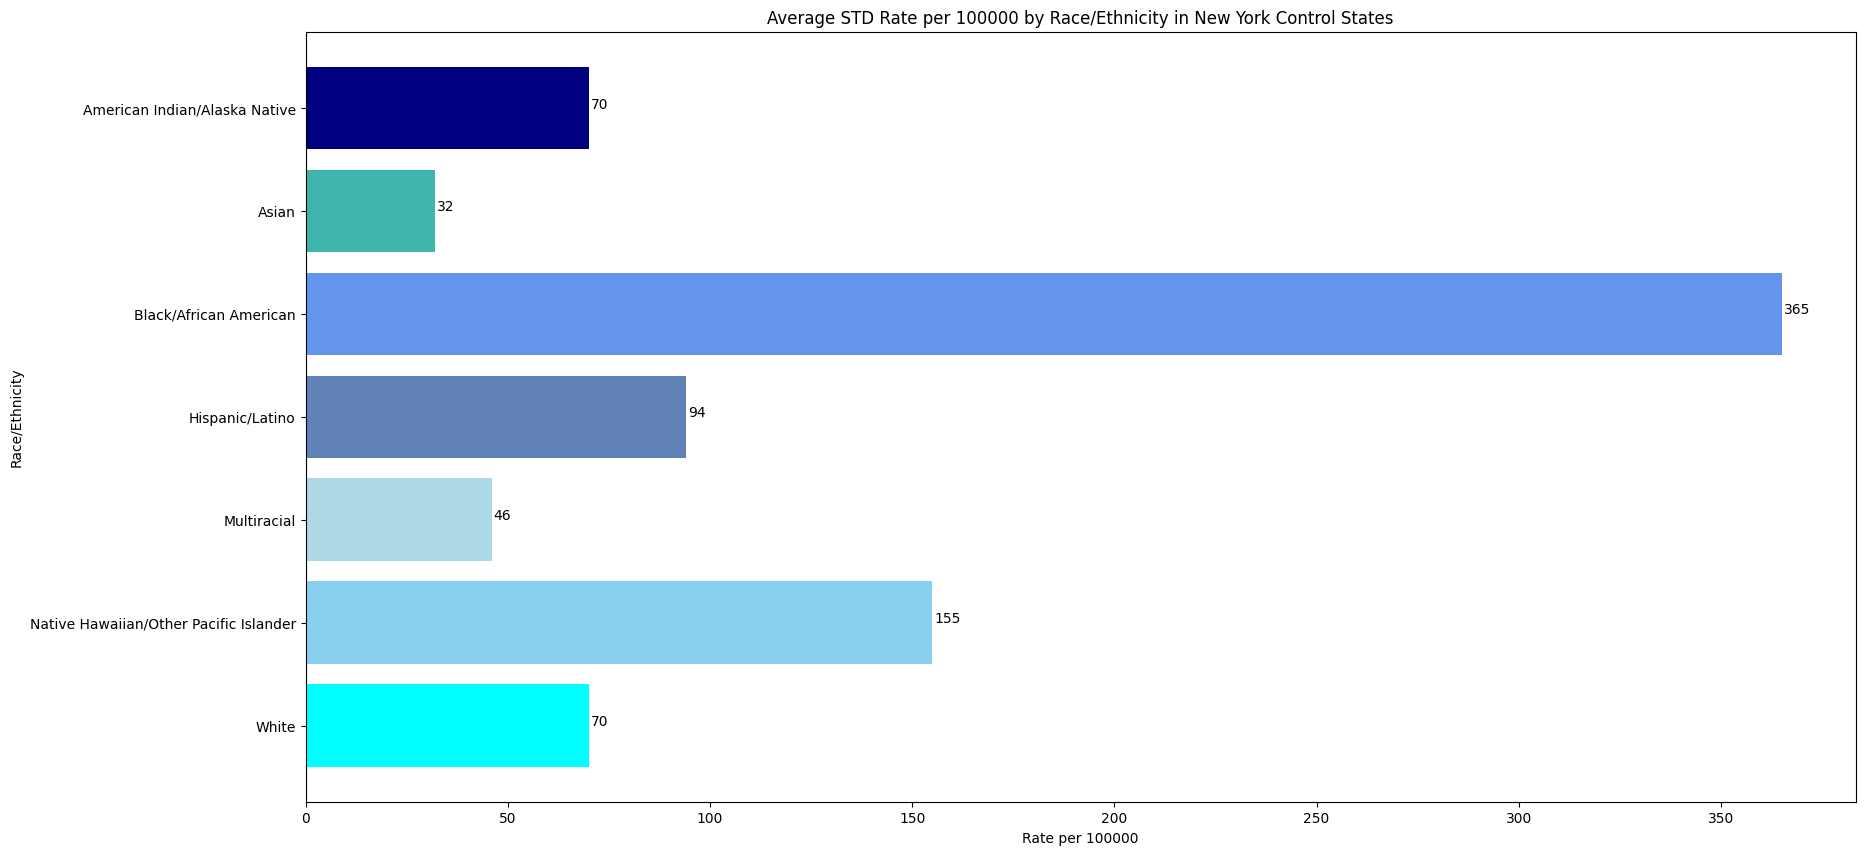

In [45]:
ny_controls_std_by_race = std_bar_chart(sexual_disease_data_ny_control_2, "Race/Ethnicity", "Rate per 100000", ny_colors, "New York Control States")

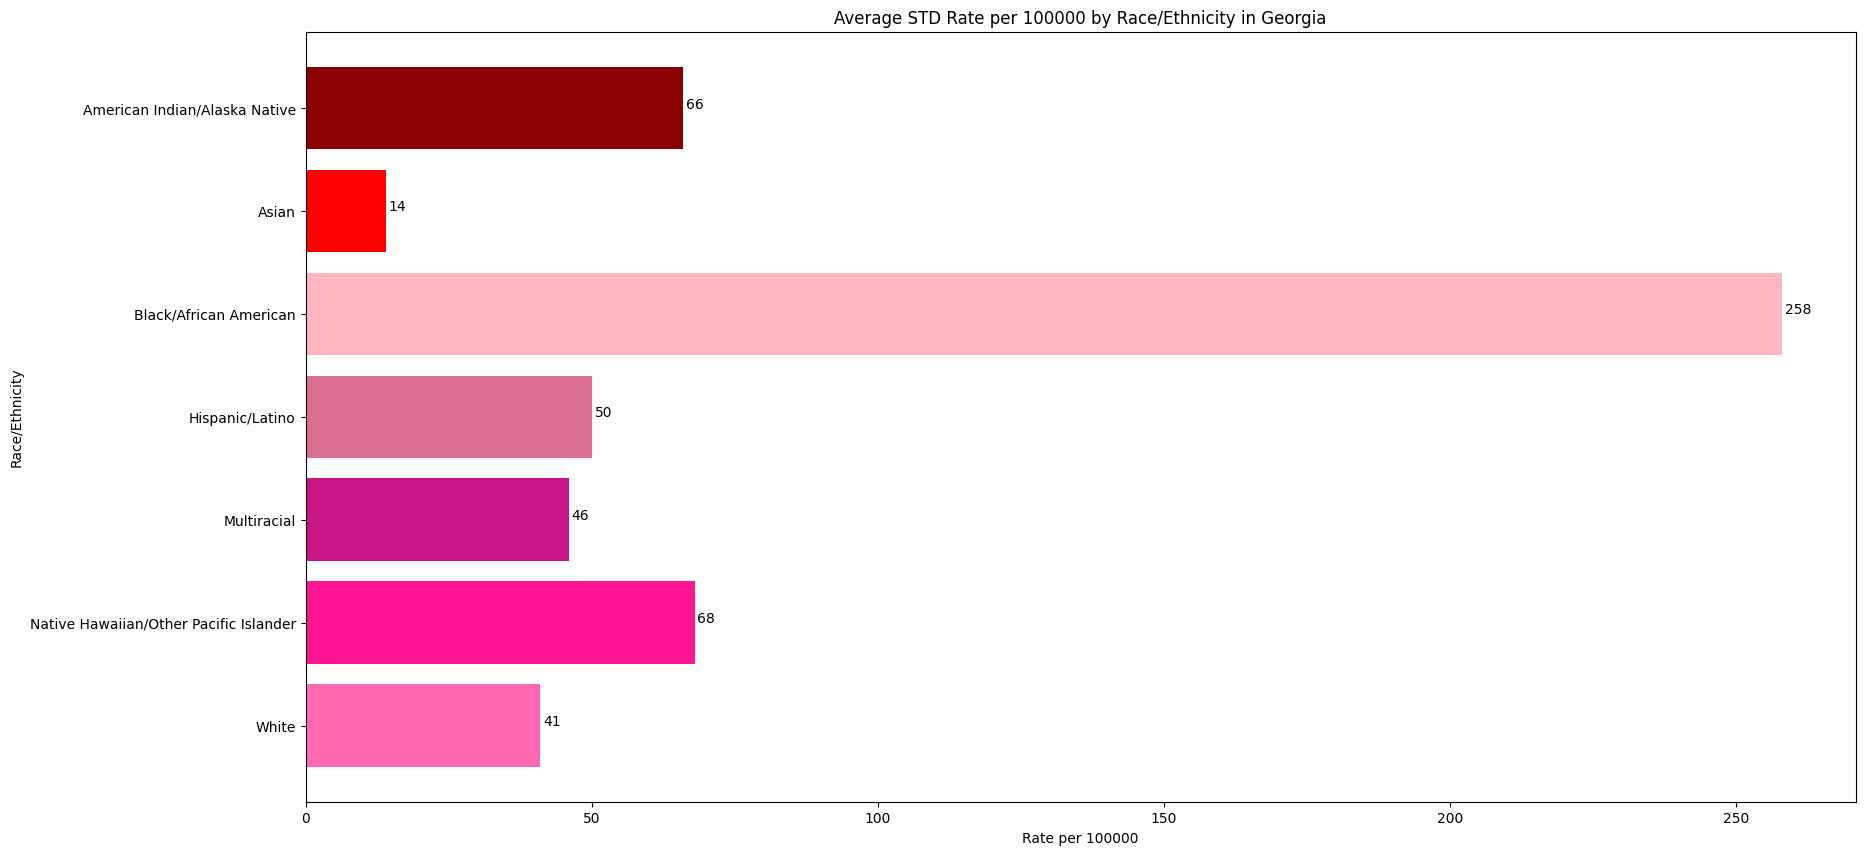

In [46]:
ga_std_by_race = std_bar_chart(sexual_disease_data_ga_2, "Race/Ethnicity", "Rate per 100000", ga_colors, "Georgia")

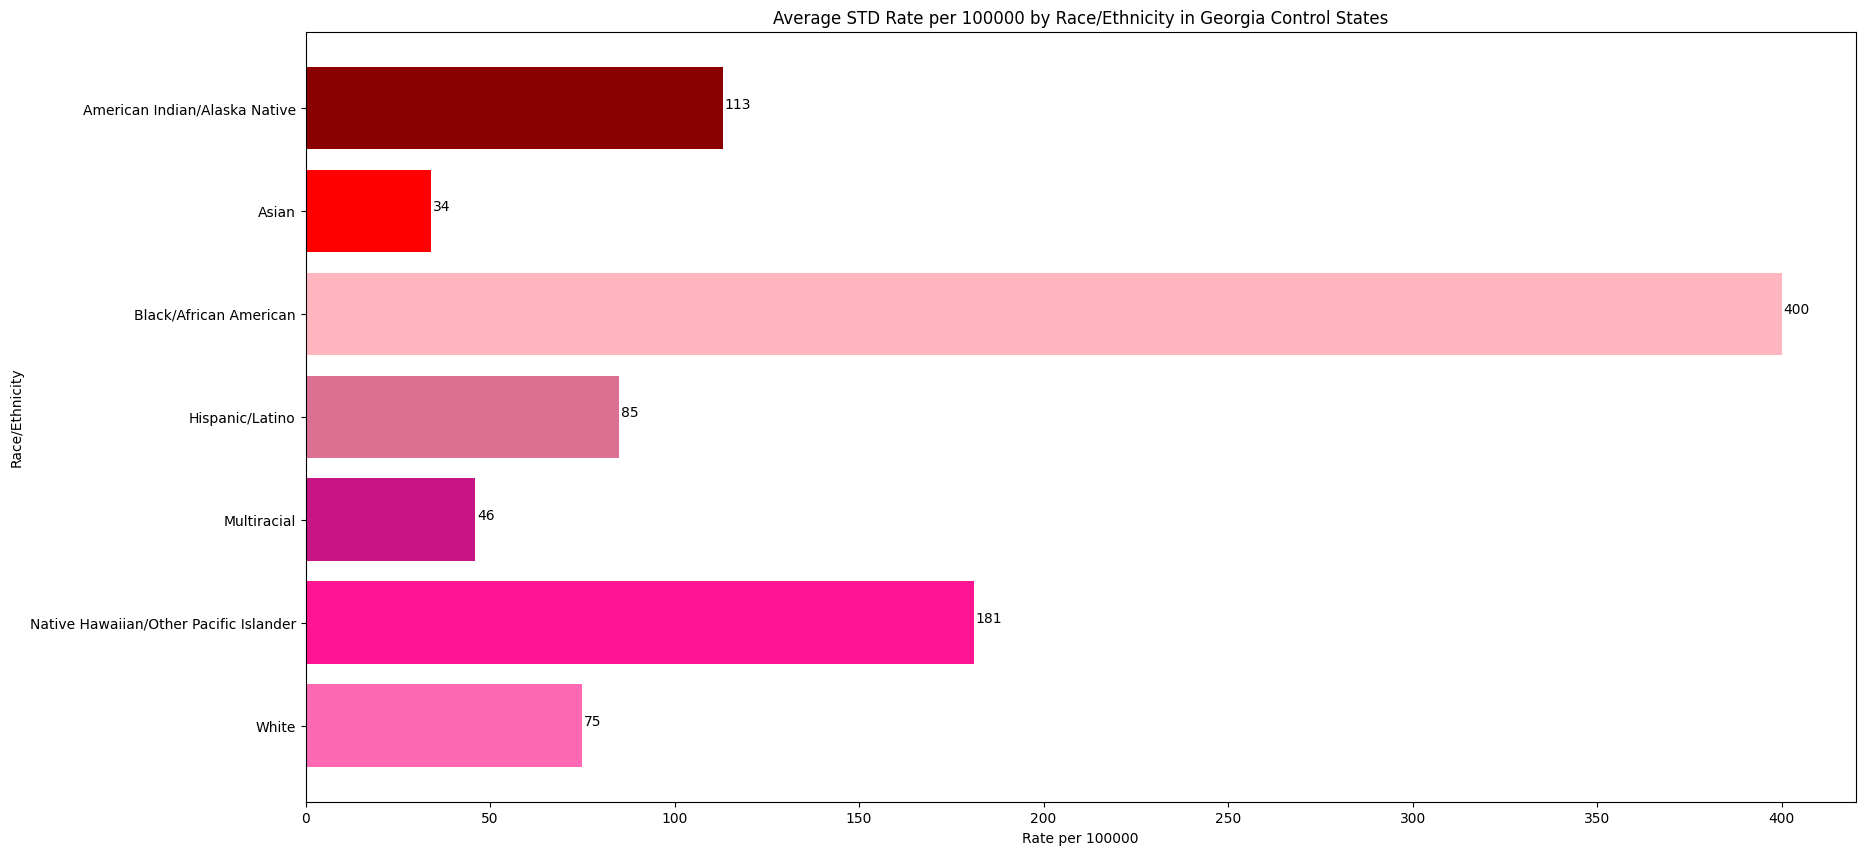

In [47]:
ga_controls_std_by_race = std_bar_chart(sexual_disease_data_ga_control_2, "Race/Ethnicity", "Rate per 100000", ga_colors, "Georgia Control States")

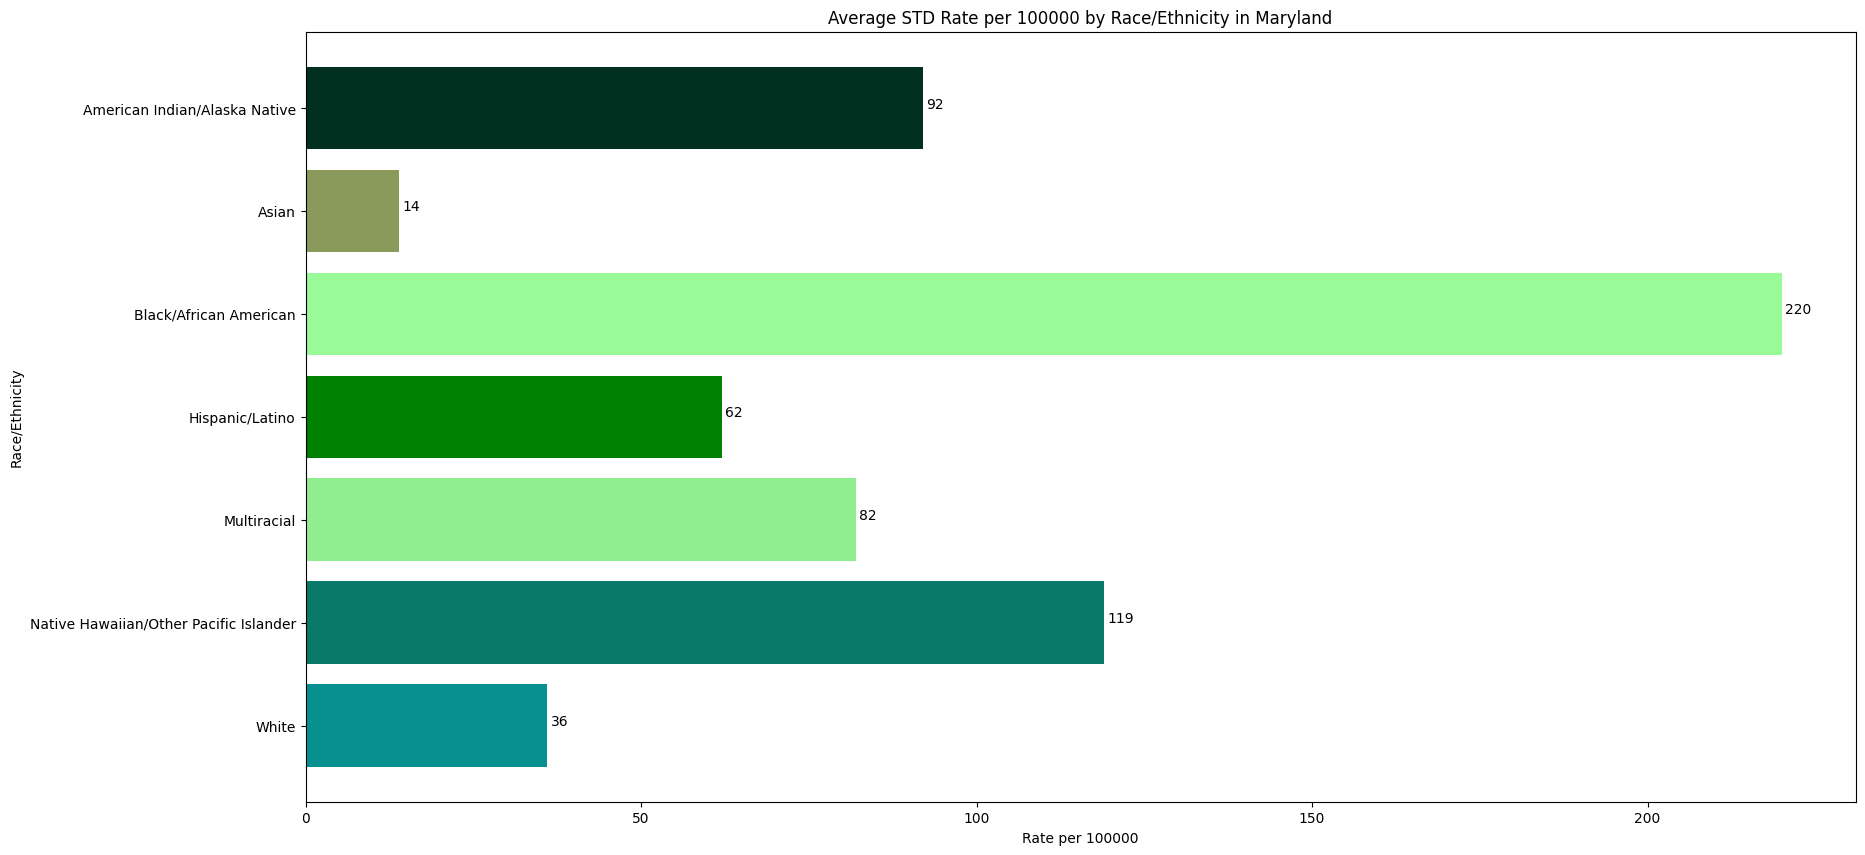

In [48]:
md_std_by_race = std_bar_chart(sexual_disease_data_md_2, "Race/Ethnicity", "Rate per 100000", md_colors, "Maryland")

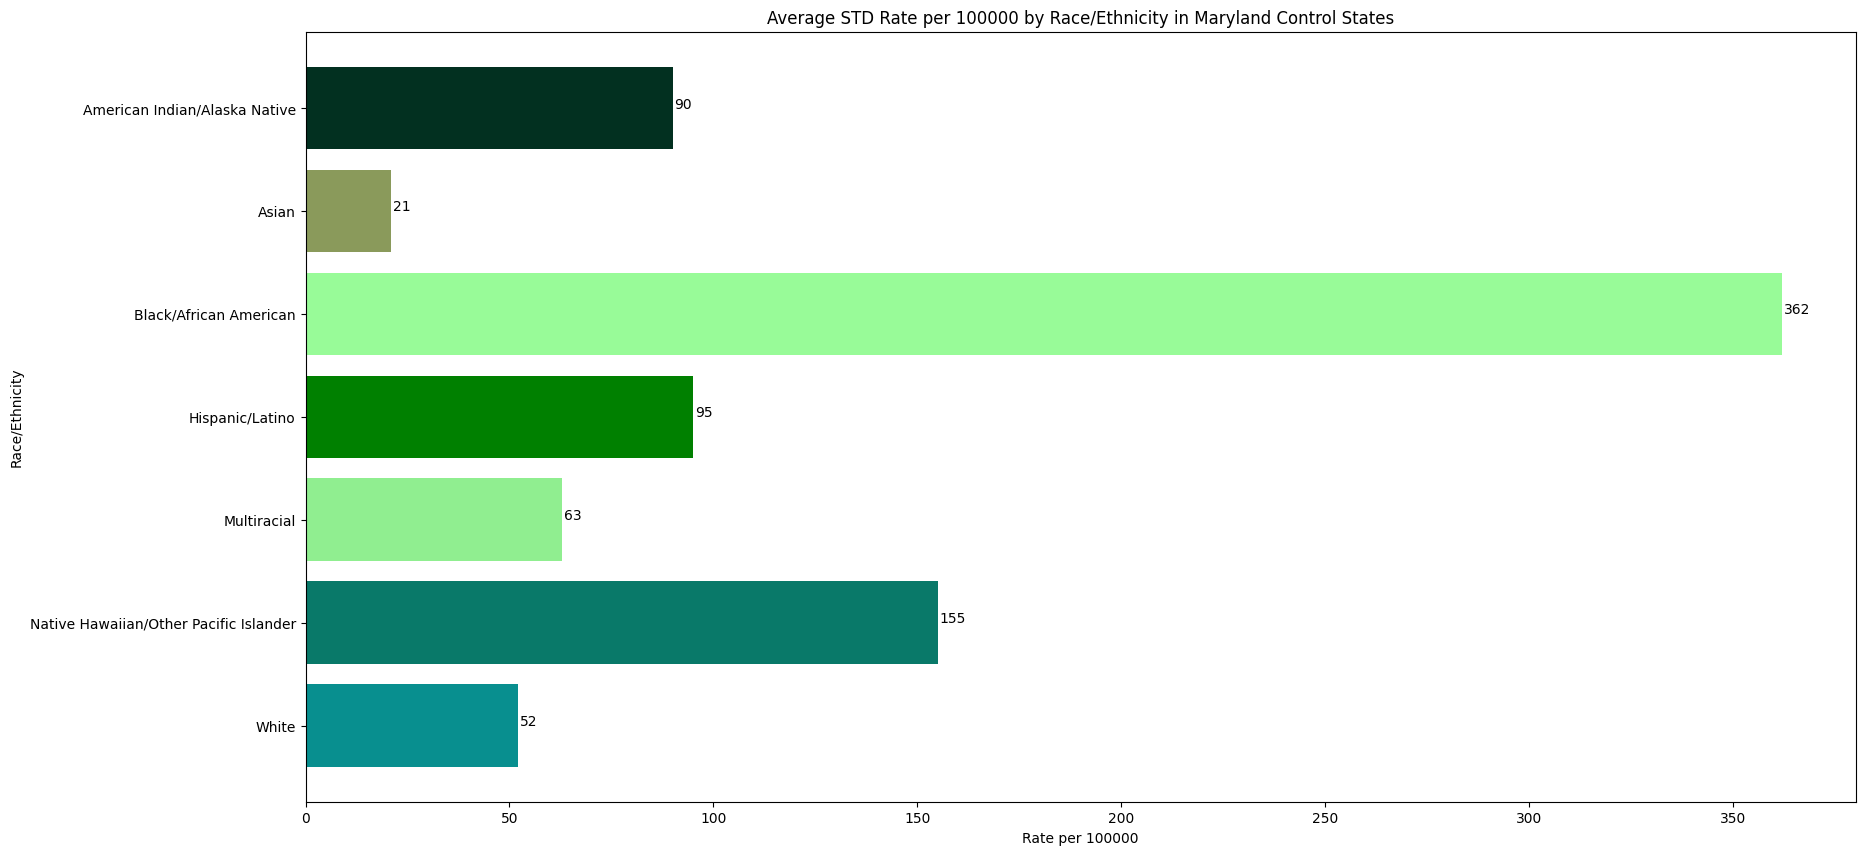

In [49]:
md_controls_std_by_race = std_bar_chart(sexual_disease_data_md_control_2, "Race/Ethnicity", "Rate per 100000", md_colors, "Maryland Control States")

## Analysis of Age

In [50]:
def std_doughnut_chart(std_df, std_column, std_column_2, state_colors, state):
    # Create a larger figure
    fig, ax = plt.subplots(figsize=(12, 10))

    colors = state_colors

    labels = list(std_df[std_column].unique())
    labels_sorted = labels.sort(reverse=True)

    sizes = [int(std_df[(std_df[std_column] == label)][std_column_2].mean()) for label in labels]

    # Create a colormap with different shades of green
    colors = state_colors

    # Add custom colors to the pie chart
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.8, wedgeprops=dict(width=0.4, edgecolor='white'))

    # Add formatting to the bar chart
    ax.axis('equal')
    ax.set_title(f'Average STD {std_column_2} by {std_column} in {state}', color='black', pad=20)
    plt.xticks(color='black')
    plt.yticks(color='black')

    # Change the text color on the chart
    for text in texts:
        text.set_color('black')
    for autotext in autotexts:
        autotext.set_color('black')

    doughnut_chart = plt.show()
    return doughnut_chart

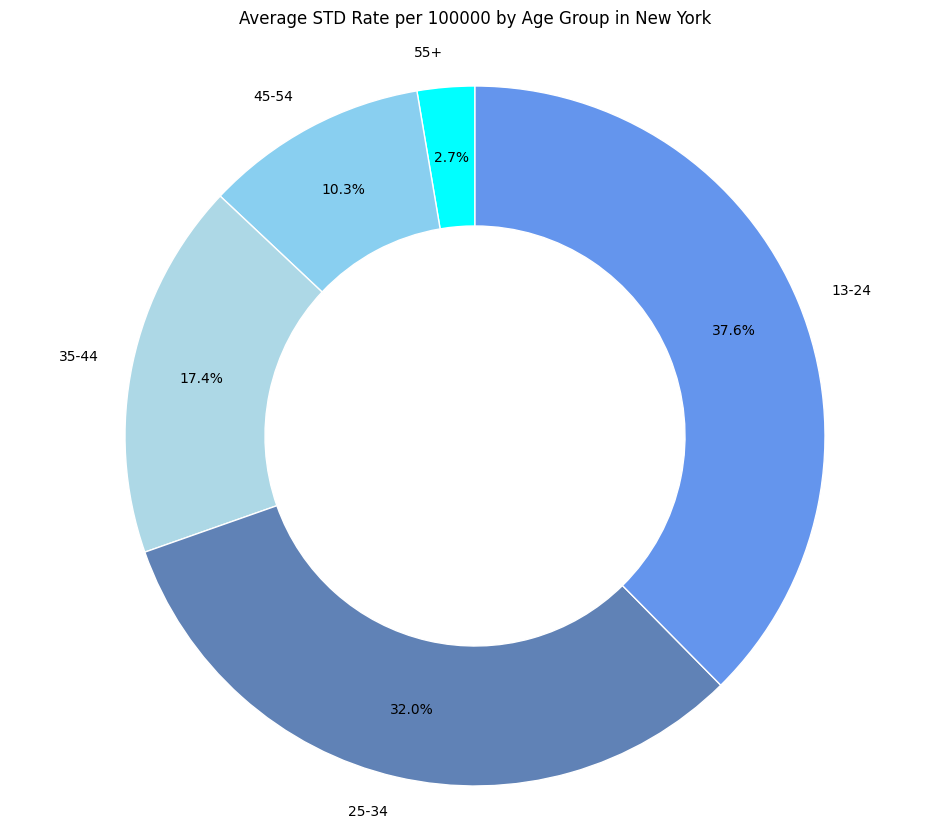

In [51]:
ny_std_by_age = std_doughnut_chart(sexual_disease_data_ny_2, "Age Group", "Rate per 100000", ny_colors, "New York")

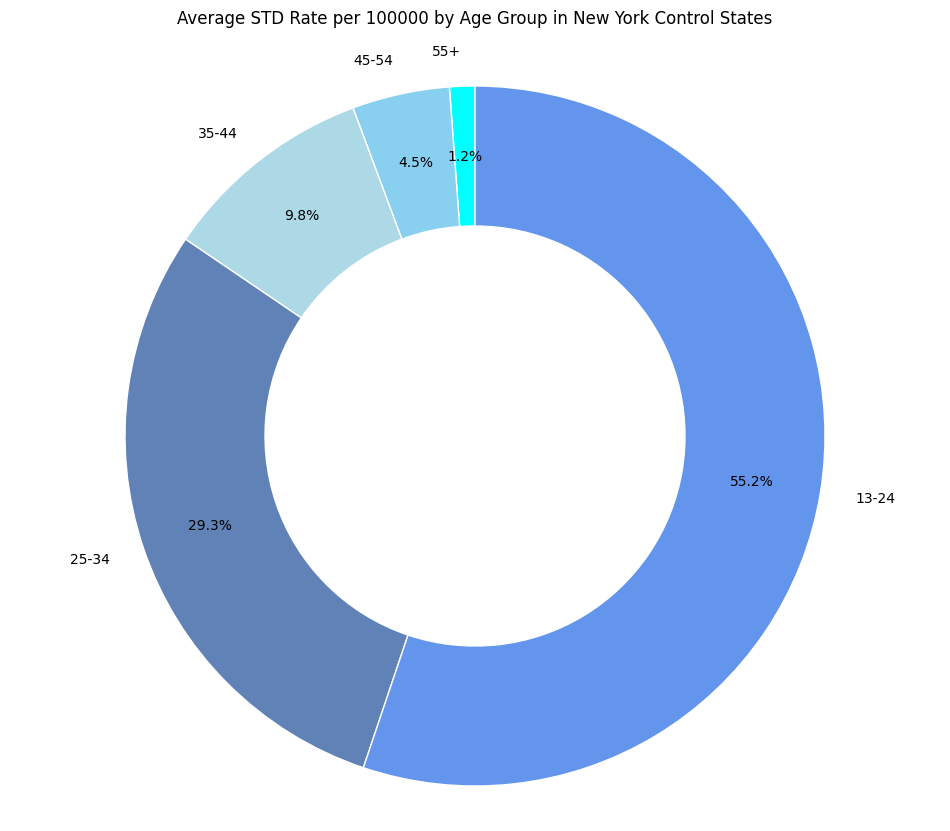

In [52]:
ny_controls_std_by_age = std_doughnut_chart(sexual_disease_data_ny_control_2, "Age Group", "Rate per 100000", ny_colors, "New York Control States")

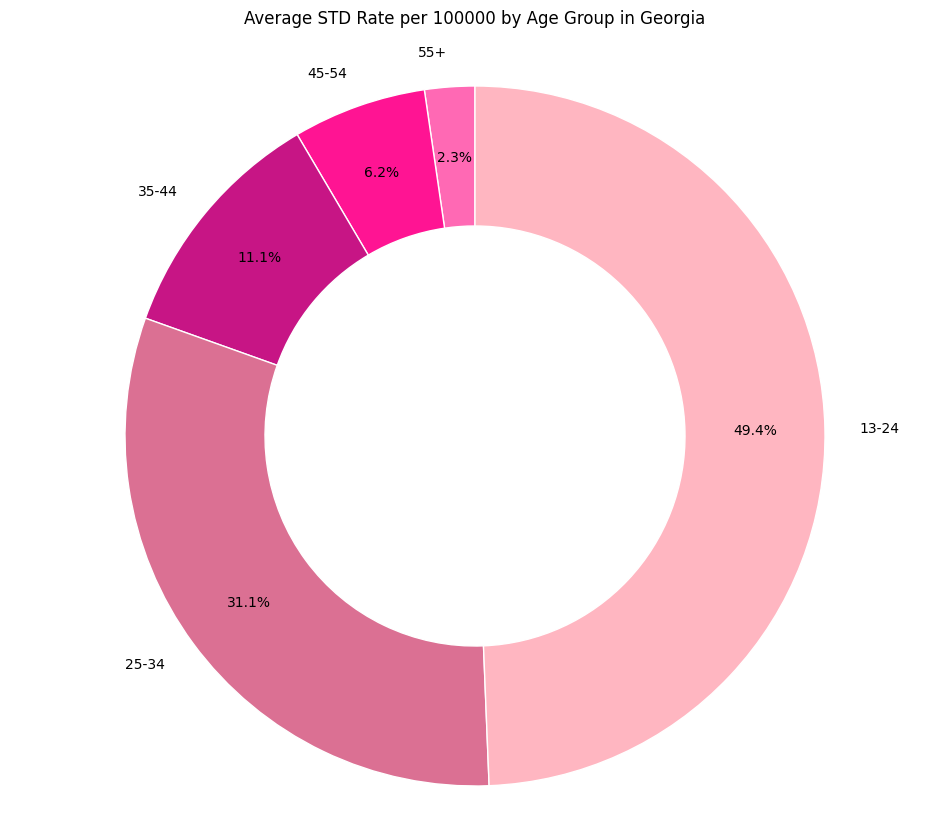

In [53]:
ga_std_by_age = std_doughnut_chart(sexual_disease_data_ga_2, "Age Group", "Rate per 100000", ga_colors, "Georgia")

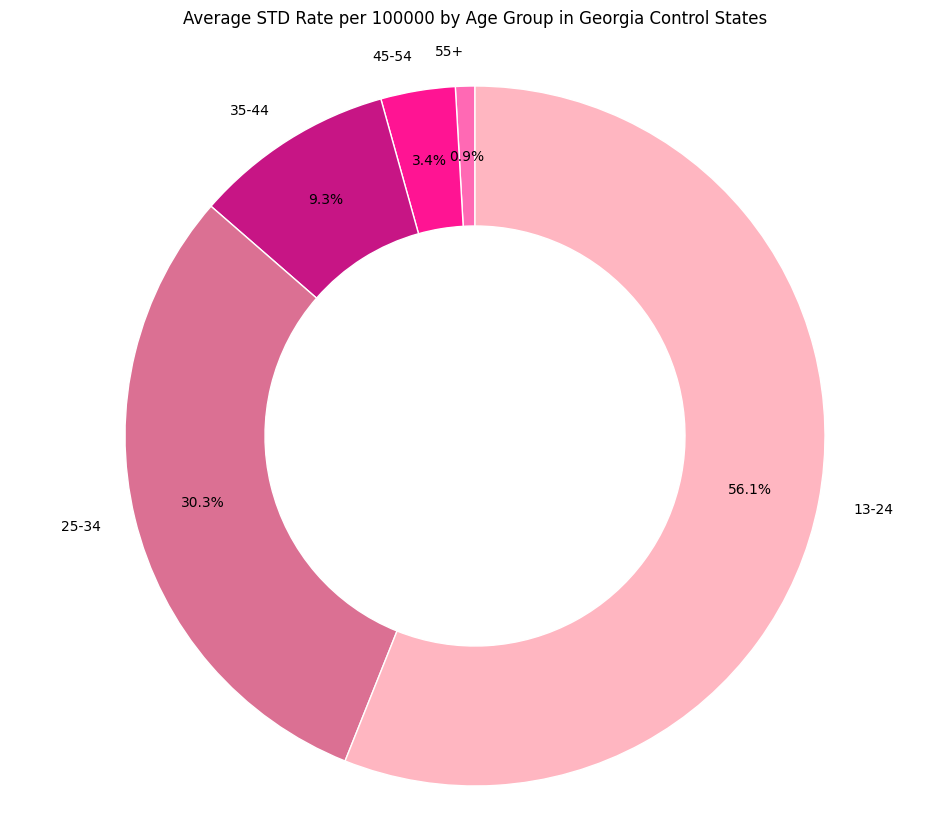

In [54]:
ga_controls_std_by_age = std_doughnut_chart(sexual_disease_data_ga_control_2, "Age Group", "Rate per 100000", ga_colors, "Georgia Control States")

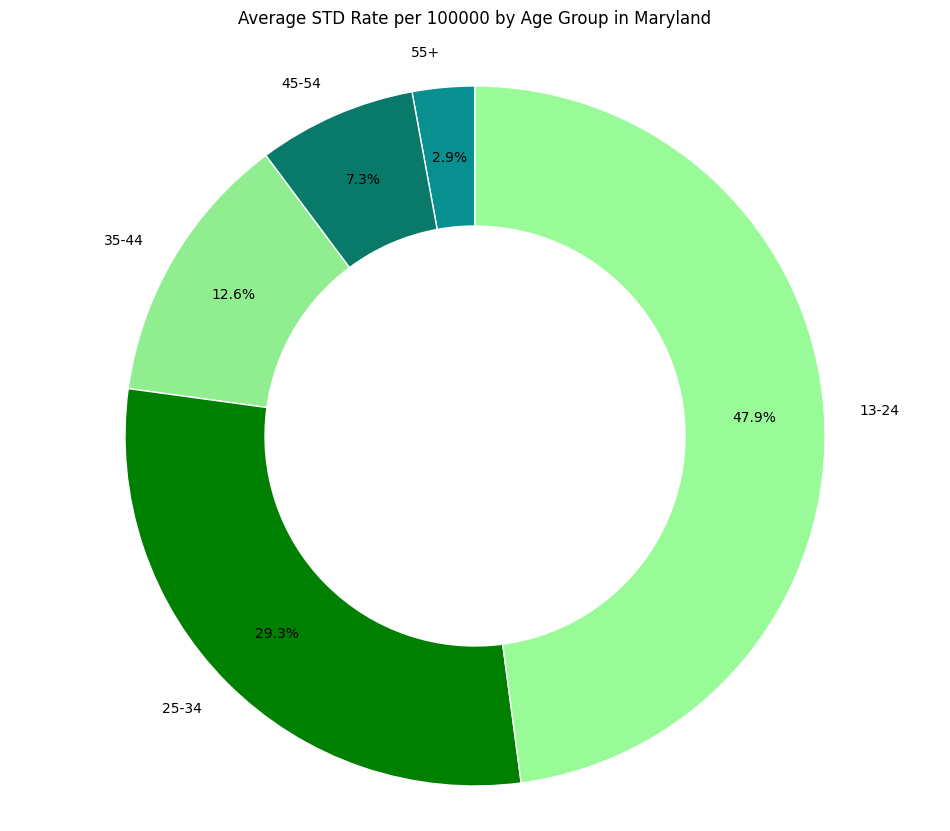

In [55]:
md_std_by_age = std_doughnut_chart(sexual_disease_data_md_2, "Age Group", "Rate per 100000", md_colors, "Maryland")

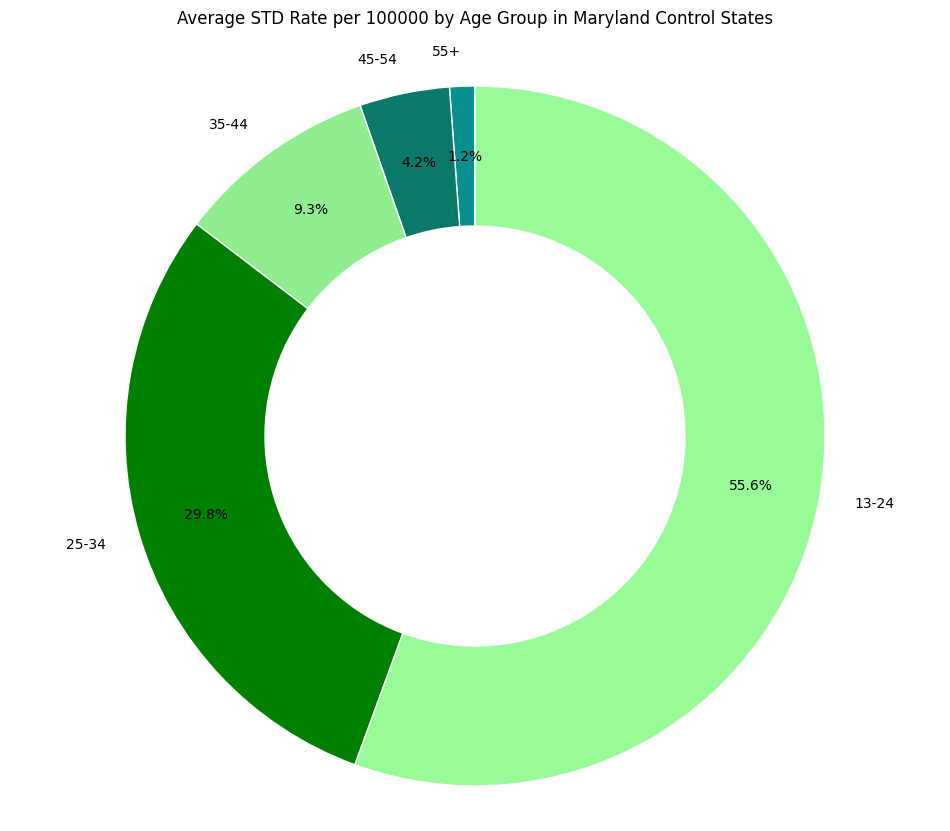

In [56]:
md_controls_std_by_age = std_doughnut_chart(sexual_disease_data_md_control_2, "Age Group", "Rate per 100000", md_colors, "Maryland Control States")

## Analysis of Gender

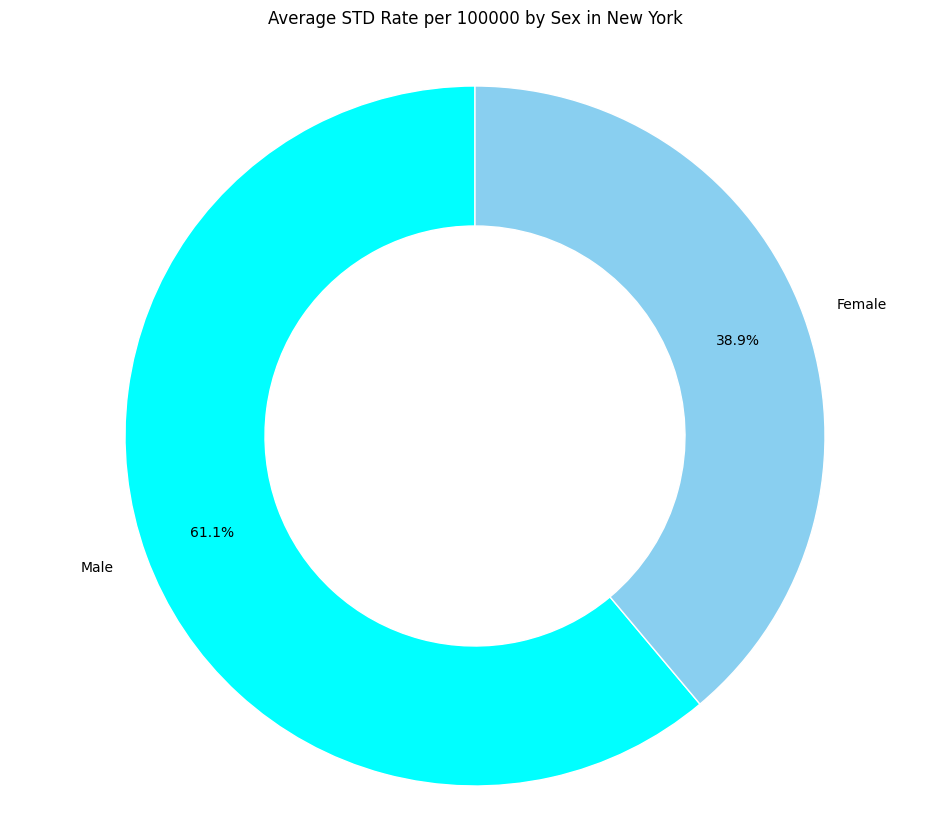

In [57]:
ny_std_by_gender = std_doughnut_chart(sexual_disease_data_ny_2, "Sex", "Rate per 100000", ny_colors, "New York")

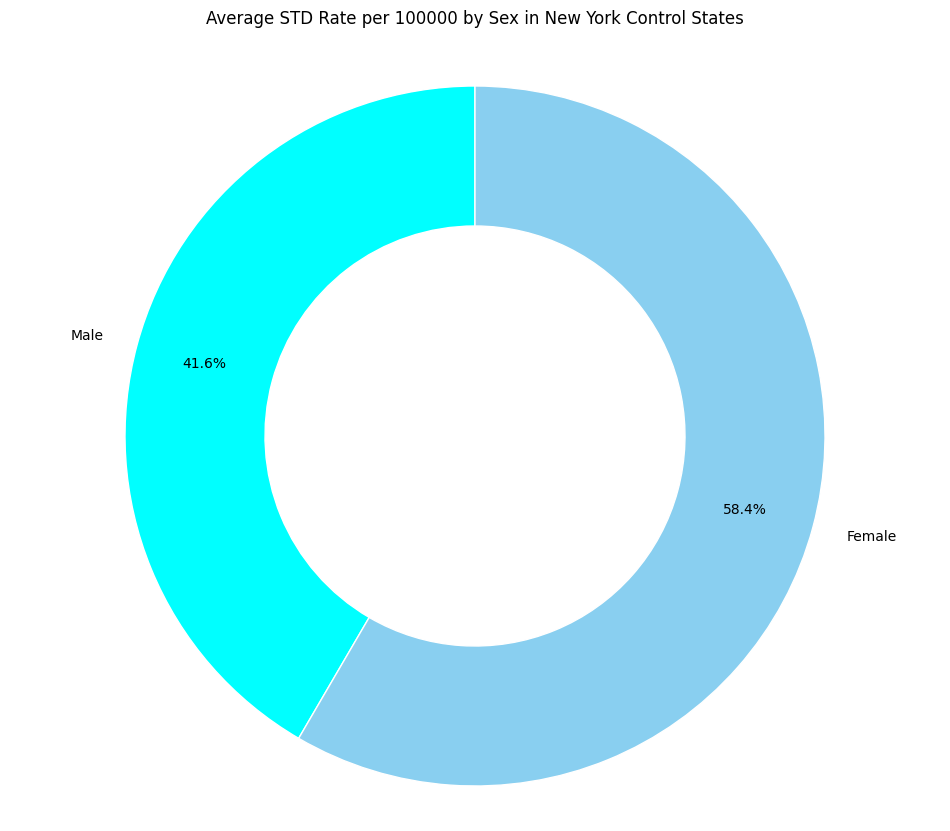

In [58]:
ny_controls_std_by_gender = std_doughnut_chart(sexual_disease_data_ny_control_2, "Sex", "Rate per 100000", ny_colors, "New York Control States")

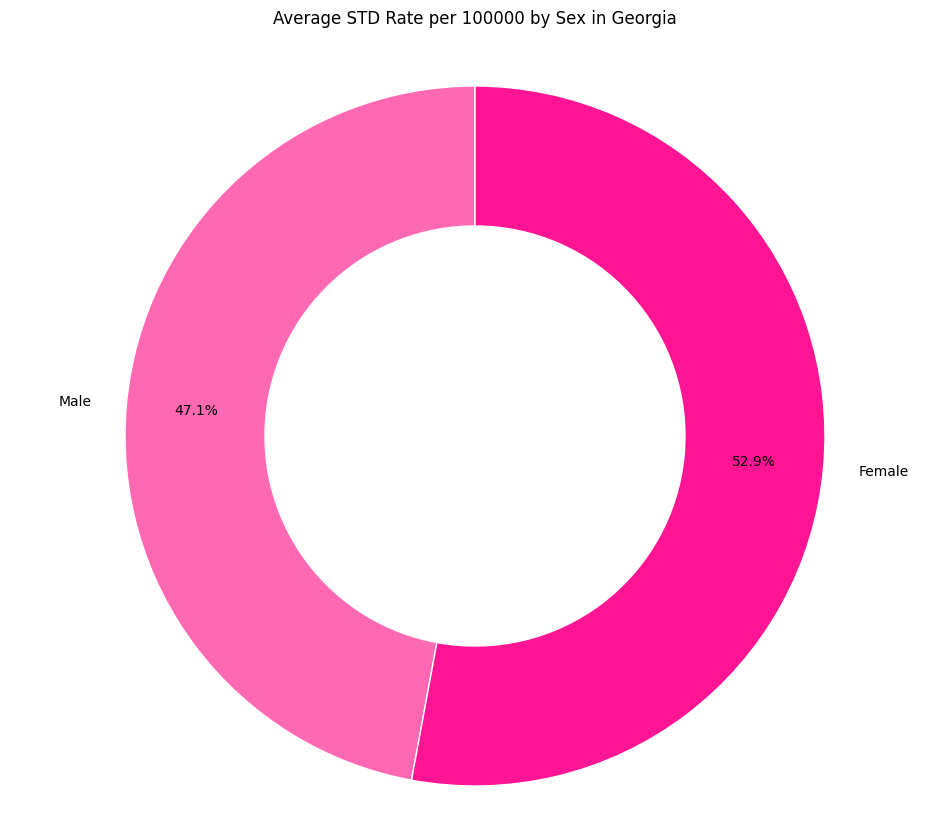

In [59]:
ga_std_by_gender = std_doughnut_chart(sexual_disease_data_ga_2, "Sex", "Rate per 100000", ga_colors, "Georgia")

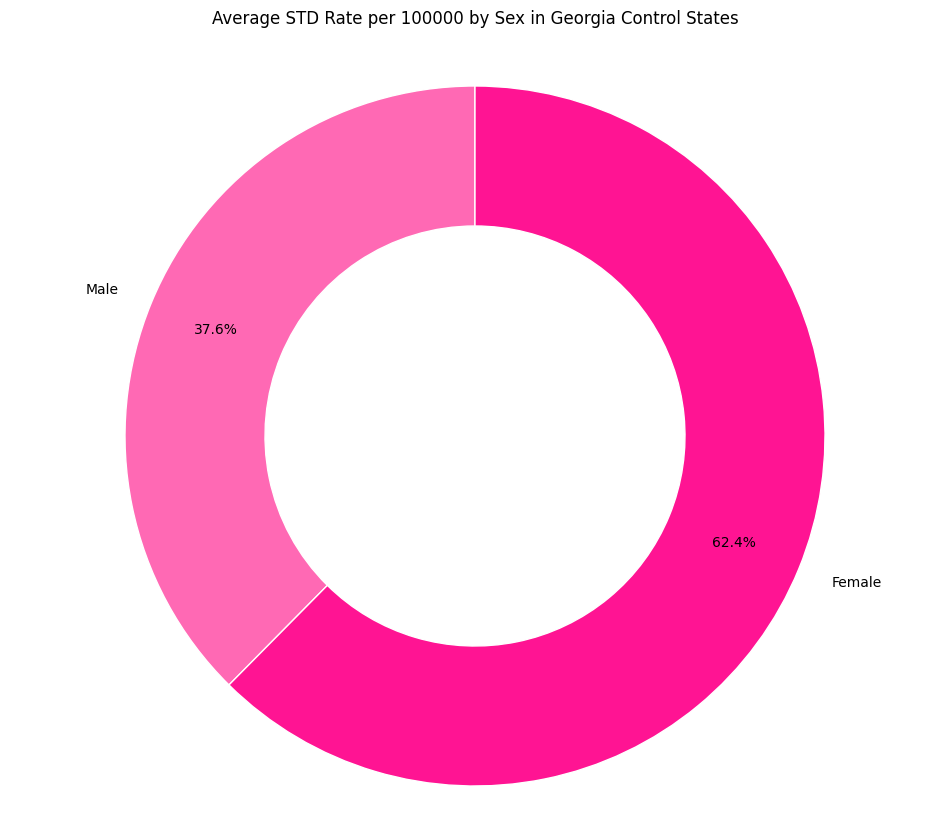

In [60]:
ga_controls_std_by_gender = std_doughnut_chart(sexual_disease_data_ga_control_2, "Sex", "Rate per 100000", ga_colors, "Georgia Control States")

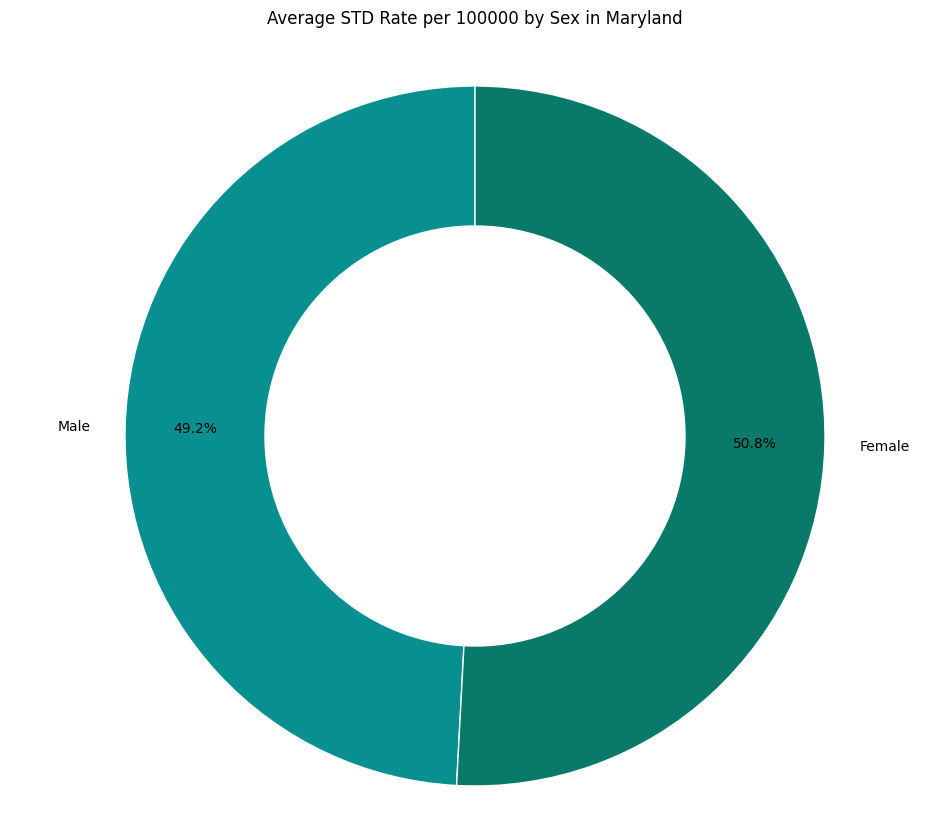

In [61]:
md_std_by_gender = std_doughnut_chart(sexual_disease_data_md_2, "Sex", "Rate per 100000", md_colors, "Maryland")

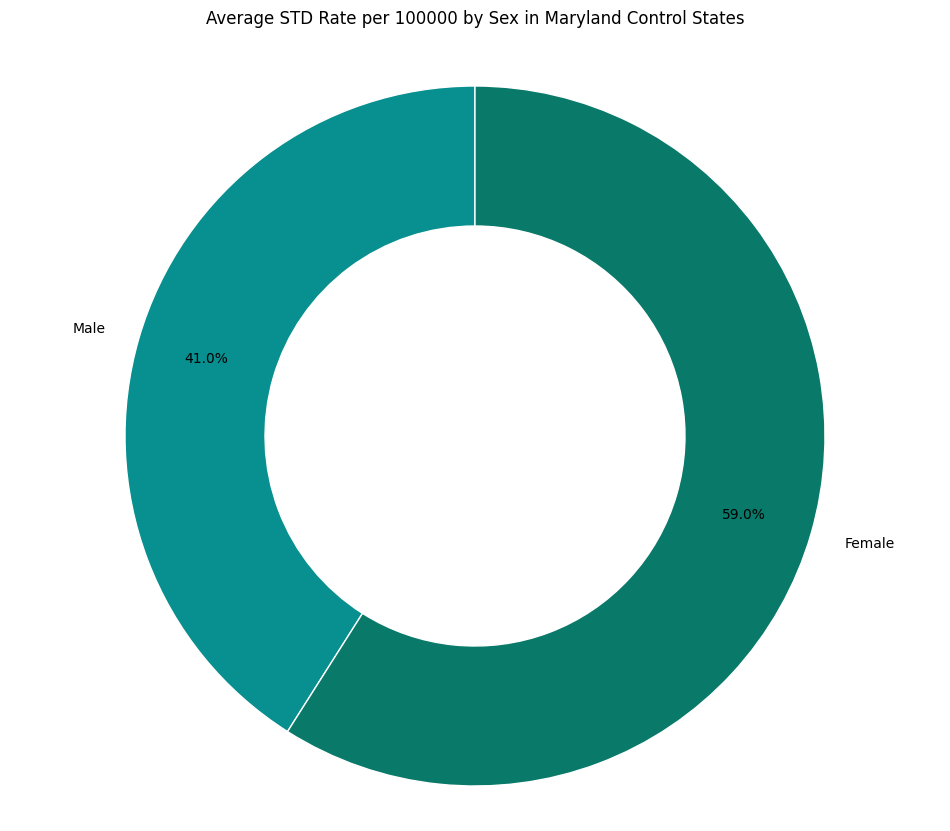

In [62]:
md_controls_std_by_gender = std_doughnut_chart(sexual_disease_data_md_control_2, "Sex", "Rate per 100000", md_colors, "Maryland Control States")